<a href="https://colab.research.google.com/github/ameenattar92/Diabetes-risk-prediction/blob/main/Diabetes%20Risk%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
#Importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

%matplotlib inline

# Reading Dataset

In [ ]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Data Mining/DiabetesClassificationDataset2022.csv")
pd.set_option('display.max_columns', 100)

# Exploratory Data Analysis

In [ ]:
#Checking the first five observations

diabetes_data.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,CTICU,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,109.0,19.0,15.0,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,0,119.0,118.0,6.0,3.0,2.51,0.4,100.0,NaN,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,Med-Surg ICU,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,96.0,102.0,6.0,3.0,NaN,NaN,98.0,NaN,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,CTICU,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,1.6,1.1,NaN,NaN,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,34.0,1.6,1.1,NaN,NaN,NaN,NaN,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,8.0,1,116.0,114.0,6.0,4.0,NaN,NaN,100.0,30.0,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,Med-Surg ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,89.0,60.0,NaN,NaN,NaN,NaN,100.0,NaN,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,Med-Surg ICU,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,128.0,27.0,26.0,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,NaN,NaN,NaN,NaN,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,36.9,36.9,1.3,1.3,3.5,3.5,145.0,145.0,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,12.7,0,118.0,120.0,3.0,1.0,0.56,NaN,95.0,37.0,46.0,0,0,0,0,0,0,0,1,1


In [ ]:
#Checking the last five observations

diabetes_data.tail()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
79154,166024,146,F,Caucasian,86.0,0,167.6,86.2,30.687339,0,Med-Surg ICU,36.7,36.7,NaN,NaN,NaN,NaN,17.0,17.0,117.0,25.0,25.0,NaN,NaN,NaN,NaN,186.0,186.0,3.9,3.9,140.0,140.0,9.6,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,0,116.0,116.0,6.0,3.0,0.88,NaN,94.0,NaN,137.0,0,0,0,0,0,0,0,0,0
79155,185015,154,F,Caucasian,55.0,0,165.1,91.7,33.641487,0,MICU,36.6,36.6,NaN,NaN,NaN,NaN,9.0,9.0,136.0,24.0,24.0,1.5,1.5,NaN,NaN,146.0,146.0,4.1,3.3,132.0,132.0,18.6,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.57,7.563,NaN,NaN,NaN,NaN,18.6,0,114.0,117.0,6.0,4.0,0.50,NaN,100.0,NaN,59.0,0,0,0,1,0,0,1,0,0
79156,173688,47,M,African American,61.0,0,173.0,88.1,29.436333,0,CTICU,36.8,36.8,2.6,2.6,0.4,0.4,22.0,22.0,103.0,25.0,25.0,NaN,NaN,NaN,NaN,174.0,174.0,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.0,598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,104.0,104.0,6.0,4.0,NaN,NaN,100.0,NaN,173.0,0,0,0,0,0,0,0,0,0
79157,169835,120,M,Caucasian,80.0,0,175.0,84.8,27.689796,0,CCU-CTICU,NaN,NaN,2.0,2.0,0.2,0.2,50.0,50.0,127.0,20.0,20.0,1.4,1.4,1.4,1.4,249.0,249.0,4.8,4.8,143.0,143.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,125.0,125.0,6.0,4.0,1.36,0.2,NaN,NaN,54.0,0,0,0,1,0,0,0,0,0
79158,209541,55,M,Caucasian,88.0,0,170.1,90.9,31.416316,0,Med-Surg ICU,36.9,35.7,3.0,3.0,0.7,0.7,28.0,22.0,118.0,25.0,25.0,1.2,1.2,1.4,1.4,174.0,174.0,4.6,4.0,140.0,140.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.2,NaN,NaN,NaN,NaN,206.0,153.0,306.0,206.0,45.2,45.2,7.34,7.340,206.0,206.0,206.0,206.0,10.0,1,104.0,105.0,3.0,1.0,1.47,0.7,100.0,37.4,42.0,0,0,0,0,0,0,0,1,0


In [ ]:
#Checking the variables at random

diabetes_data.sample(10)

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
34643,206363,193,F,Caucasian,43.0,1,175.0,142.00,46.367347,0,MICU,37.0,36.6,NaN,NaN,NaN,NaN,8.0,8.0,91.0,22.0,22.0,NaN,NaN,NaN,NaN,193.0,193.0,4.6,4.6,138.0,138.0,10.90,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.90,0,97.0,97.0,6.0,4.0,0.67,NaN,99.0,NaN,108.0,0,0,0,0,0,0,0,0,0
5893,200173,32,F,Caucasian,78.0,1,152.0,59.70,25.839681,0,Med-Surg ICU,36.4,36.4,1.5,1.5,0.8,0.8,15.0,15.0,134.0,21.0,21.0,NaN,NaN,NaN,NaN,206.0,206.0,3.8,3.8,139.0,139.0,13.60,13.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,102.0,340.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.60,1,92.0,85.0,6.0,4.0,0.69,0.8,100.0,35.0,56.0,0,0,0,0,0,0,0,1,1
77756,165506,27,M,Caucasian,65.0,1,175.0,83.80,27.363265,0,Med-Surg ICU,36.3,36.3,NaN,NaN,NaN,NaN,13.0,12.0,139.0,26.0,24.0,NaN,NaN,NaN,NaN,130.0,123.0,4.4,4.3,138.0,137.0,8.70,8.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,88.0,59.0,6.0,4.0,NaN,NaN,100.0,NaN,55.0,0,0,0,0,0,0,0,0,0
14875,256055,185,F,Caucasian,77.0,1,162.5,70.70,26.773965,0,CCU-CTICU,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0,149.0,22.0,22.0,NaN,NaN,NaN,NaN,258.0,258.0,4.1,4.1,137.0,137.0,23.40,23.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,90.0,105.0,6.0,4.0,NaN,NaN,94.0,NaN,137.0,0,0,0,0,0,0,0,0,1
74610,173676,79,F,Caucasian,55.0,1,187.0,73.10,20.904229,0,CSICU,36.0,36.0,2.7,2.7,0.5,0.5,10.0,10.0,122.0,25.0,25.0,NaN,NaN,NaN,NaN,171.0,171.0,4.5,4.5,139.0,139.0,8.30,8.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.30,0,96.0,54.0,6.0,3.0,0.62,0.5,100.0,NaN,42.0,0,0,0,0,0,0,1,0,0
12691,206713,176,F,Caucasian,63.0,0,167.6,131.18,46.700292,0,Neuro ICU,36.2,36.1,NaN,NaN,NaN,NaN,11.0,11.0,91.0,25.0,25.0,2.6,1.4,NaN,NaN,205.0,205.0,3.7,3.7,142.0,142.0,8.66,8.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,146.0,NaN,NaN,NaN,NaN,2.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.66,0,109.0,109.0,6.0,3.0,0.59,NaN,98.0,NaN,50.0,0,0,0,0,0,0,0,0,1
1524,232275,77,M,Caucasian,86.0,1,179.1,113.20,35.290292,0,Med-Surg ICU,36.3,36.3,NaN,NaN,NaN,NaN,20.0,20.0,95.0,24.0,24.0,1.2,1.1,NaN,NaN,145.0,130.0,4.5,3.9,139.0,139.0,15.90,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0,1.2,1.1,NaN,NaN,NaN,NaN,172.0,118.0,344.0,290.0,41.0,40.0,7.45,7.39,172.0,145.0,344.0,290.0,NaN,1,86.0,87.0,6.0,4.0,NaN,NaN,100.0,41.0,55.0,0,0,

In [ ]:
#Checking the shape of the dataset

diabetes_data.shape

(79159, 88)

In [ ]:
#Getting the column names

diabetes_data.columns

Index(['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max',
       'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max',
       'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min',
       'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min',
       'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
       'h1_lactate_max', 'h1_lactate_min', 'h1_sodium_max', '

In [ ]:
#Checking the dataset information

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [ ]:
#Looking up for the detailed description of our dataset.

diabetes_data.describe(include="all")

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79129,78198,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,79159,61223.000000,61223.000000,36066.000000,36066.000000,32682.000000,32682.000000,71249.000000,71249.000000,74800.000000,67258.000000,67258.000000,29693.000000,29693.000000,21350.000000,21350.000000,67993.000000,67993.000000,71972.000000,71972.000000,71544.000000,71544.000000,68680.000000,68680.000000,6888.000000,6888.000000,6310.000000,6310.000000,15753.000000,15753.000000,15196.00000,15196.000000,15884.000000,15884.000000,35387.000000,35387.000000,14808.000000,14808.000000,16616.000000,16616.000000,29693.000000,29693.000000,7174.000000,7174.000000,17763.000000,17763.000000,28333.000000,28333.000000,22583.000000,22583.000000,13872.000000,13872.000000,13770.00000,13770.000000,14017.000000,14017.000000,10343.000000,10343.000000,61408.000000,79159.000000,79014.000000,79003.000000,77935.000000,77935.000000,64575.000000,29109.000000,75355.000000,18540.000000,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
unique,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,M,Caucasian,NaN,NaN,NaN,NaN,NaN,NaN,Med-Surg ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,42912,60378,NaN,NaN,NaN,NaN,NaN,NaN,43608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,212863.726740,106.188620,NaN,NaN,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,NaN,36.721315,36.612966,2.947069,2.876040,1.162205,1.088215,26.640040,24.458436,116.255602,24.441869,23.105831,1.582532,1.469584,2.906735,2.074512,206.743474,195.751543,4.276102,3.938118,139.130432,137.615354,12.578483,11.343871,3.000608,2.999506,1.160605,1.159940,26.701124,26.680283,8.29413,8.287464,1.582505,1.580619,178.462352,168.669568,22.394942,22.336035,33.631157,33.258745,1.582532,1.469584,3.045151,2.990

In [ ]:
#Exploring the numeriacl variable

numerical_var = diabetes_data.select_dtypes(include=[np.number])
numerical_var

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,68.0,0,180.3,73.9,22.732803,0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,109.0,19.0,15.0,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,0,119.0,118.0,6.0,3.0,2.51,0.4,100.0,NaN,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,25.0,0,172.7,95.3,31.952749,0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,96.0,102.0,6.0,3.0,NaN,NaN,98.0,NaN,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,81.0,1,165.1,61.7,22.635548,0,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,1.6,1.1,NaN,NaN,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,34.0,1.6,1.1,NaN,NaN,NaN,NaN,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.340,337.0,265.0,337.0,337.0,8.0,1,116.0,114.0,6.0,4.0,NaN,NaN,100.0,30.0,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,19.0,0,188.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,89.0,60.0,NaN,NaN,NaN,NaN,100.0,NaN,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,77.0,0,160.0,70.2,27.421875,0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,128.0,27.0,26.0,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,NaN,NaN,NaN,NaN,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,36.9,36.9,1.3,1.3,3.5,3.5,145.0,145.0,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.450,51.0,51.0,51.0,51.0,12.7,0,118.0,120.0,3.0,1.0,0.56,NaN,95.0,37.0,46.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,166024,146,86.0,0,167.6,86.2,30.687339,0,36.7,36.7,NaN,NaN,NaN,NaN,17.0,17.0,117.0,25.0,25.0,NaN,NaN,NaN,NaN,186.0,186.0,3.9,3.9,140.0,140.0,9.6,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,0,116.0,116.0,6.0,3.0,0.88,NaN,94.0,NaN,137.0,0,0,0,0,0,0,0,0,0
79155,185015,154,55.0,0,165.1,91.7,33.641487,0,36.6,36.6,NaN,NaN,NaN,NaN,9.0,9.0,136.0,24.0,24.0,1.5,1.5,NaN,NaN,146.0,146.0,4.1,3.3,132.0,132.0,18.6,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.5,NaN,NaN,NaN,NaN,N

In [ ]:
#Exploring the categorical variable

categorical_var = diabetes_data.select_dtypes(exclude=[np.number])
categorical_var

,gender,ethnicity,icu_type
0,M,Caucasian,CTICU
1,F,Caucasian,Med-Surg ICU
2,F,Caucasian,CTICU
3,M,Caucasian,Med-Surg ICU
4,F,Caucasian,Med-Surg ICU
...,...,...,...
79154,F,Caucasian,Med-Surg ICU
79155,F,Caucasian,MICU
79156,M,African American,CTICU
79157,M,Caucasian,CCU-CTICU


**Exploring the dependent variable**

In [ ]:
diabetes_data['diabetes_mellitus'].value_counts()

0    51007
1    28152
Name: diabetes_mellitus, dtype: int64

In [ ]:
#Checking the percentage of the class

diabetes_data['diabetes_mellitus'].value_counts(normalize=True)

0    0.644361
1    0.355639
Name: diabetes_mellitus, dtype: float64

In [ ]:
#calculating the mean

diabetes_data.groupby('diabetes_mellitus').mean()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache
diabetes_mellitus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,212868.750132,106.107613,61.263369,0.191189,169.591233,81.765154,28.402598,0.0,36.725636,36.618848,2.959741,2.889282,1.244113,1.163722,24.033217,22.235588,111.702380,24.475244,23.317978,1.563021,1.451068,2.914590,2.079288,205.073220,193.979312,4.220378,3.919636,139.209412,137.836901,12.553008,11.298559,3.004798,3.003716,1.232000,1.231180,24.108082,24.088292,8.249913,8.239958,1.421614,1.419697,149.444761,142.521362,22.803952,22.743089,33.964336,33.589624,1.563021,1.451068,3.051269,2.994293,138.306815,138.002737,166.744363,103.989098,288.999334,225.138157,44.617726,43.430528,7.338737,7.329377,165.603048,148.509170,250.056157,242.462265,12.200390,0.155410,103.732008,100.350219,5.472690,3.478739,1.378773,1.255843,98.068959,42.222186,87.219867,0.001078,0.015057,0.012665,0.025722,0.007019,0.004039,0.022722,0.327347
1,212854.625142,106.335394,64.564055,0.186168,169.518613,91.179621,31.766517,0.0,36.713448,36.602257,2.924926,2.852902,1.016114,0.953542,31.217154,28.361359,124.033781,24.382863,22.730771,1.618587,1.503801,2.893546,2.066493,209.733084,198.923684,4.373752,3.970506,138.991605,137.225934,12.624146,11.425091,2.993503,2.992368,1.034845,1.034451,30.656364,30.633921,8.360975,8.359280,1.827779,1.825940,214.936534,201.537024,21.759886,21.704017,33.046851,32.678472,1.618587,1.503801,3.035048,2.982973,137.764782,137.496739,159.024539,98.913225,284.037150,219.746853,44.522076,43.208125,7.331668,7.321048,157.036245,138.574004,239.751280,231.026796,12.276142,0.156436,102.297151,98.890189,5.540603,3.530798,1.840607,1.018866,98.184855,42.343515,87.383524,0.000391,0.019714,0.015700,0.024758,0.007886,0.004156,0.017263,0.341113


In [ ]:
# Checking the null values in dependent variable

diabetes_data['diabetes_mellitus'].isnull().sum()

0

Text(0.5, 0, '')

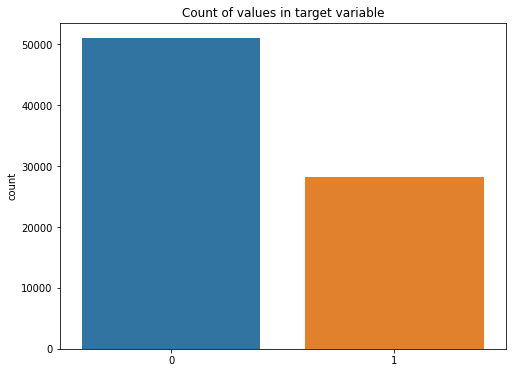

In [ ]:
# Code below plots the count plot for target variable in order to visualise the values

plt.figure(figsize=(8,6))
count = sns.countplot(x=diabetes_data['diabetes_mellitus'])
count.set_title('Count of values in target variable')
count.set_xticklabels(['0', '1'])
count.set_xlabel('')

**Now let's go ahead and check for the missing values in rest of the dataset**

In [ ]:
#Checking for the missing values in the whole dataset

missing_values = diabetes_data.isnull()
missing_values

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_sodium_max,h1_sodium_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,bilirubin_apache,h1_spo2_max,paco2_apache,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,False,False,True,True,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#Getting the sum of all the missing values in each variable

sum_missing_values = diabetes_data.isnull().sum()

sum_missing_values

encounter_id                      0
hospital_id                       0
gender                           30
ethnicity                       961
age                            2842
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
ventilated_apache                 0
diabetes_mellitus                 0
Length: 88, dtype: int64

In [ ]:
#checking missing values only for numerical variable

numerical_var.isnull().sum()

encounter_id                      0
hospital_id                       0
age                            2842
elective_surgery                  0
height                         1181
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
ventilated_apache                 0
diabetes_mellitus                 0
Length: 85, dtype: int64

In [ ]:
#Checking the missing values only for categorical variable

categorical_var.isnull().sum()

gender        30
ethnicity    961
icu_type       0
dtype: int64

In [ ]:
# A list comprehension which gives out all the column names with missing values

[features for features in diabetes_data.columns if diabetes_data[features].isnull().sum()>0.]

['gender',
 'ethnicity',
 'age',
 'height',
 'weight',
 'bmi',
 'h1_temp_max',
 'h1_temp_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_sodium_max',
 'h1_sodium_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'h1_arterial_pco2

**As we can see there are lots of columns with the missing values**

**Let us go ahead and plot the heatmap for missing values**

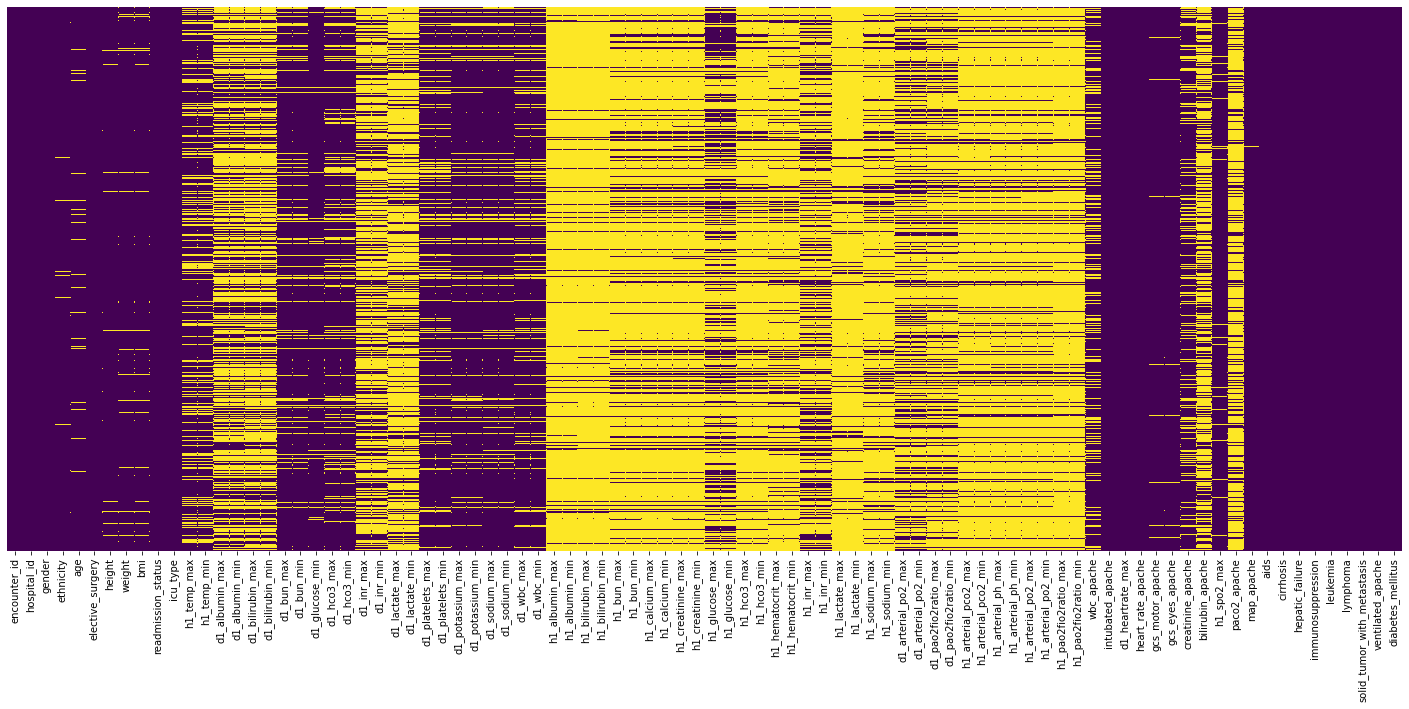

In [ ]:
# Code below plots the heatmap for the missing values in the dataset

plt.figure(figsize=(25,10))
sns.heatmap(diabetes_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

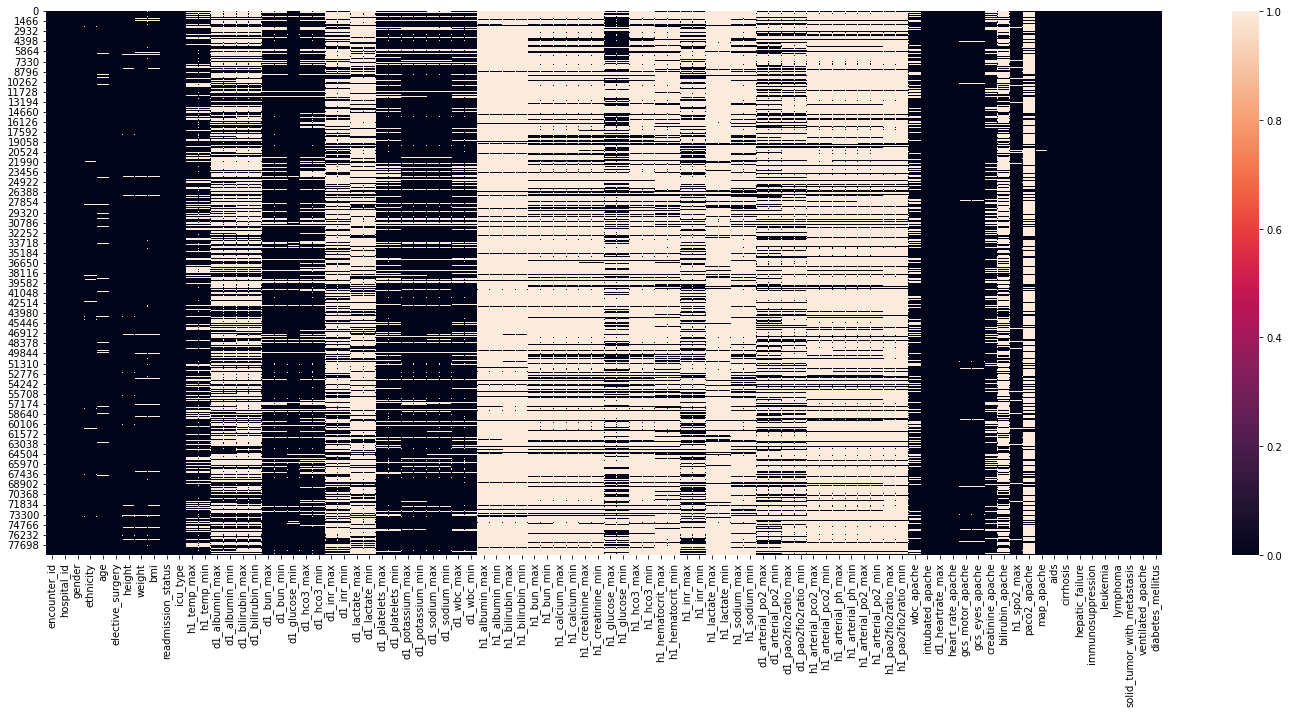

In [ ]:
# Code below plots the heatmap for the missing values in the dataset

missing_values = diabetes_data.isnull()

plt.figure(figsize=(25,10))
sns.heatmap(missing_values)

**In order to get a clear picture let's go ahead and get the precentage of all the missing values in each variable**

In [ ]:
# Code below gives us the percentage of missing values in each variable/feature

variables_with_NaN = [features for features in diabetes_data.columns if diabetes_data[features].isnull().sum()>0.]

for feature in variables_with_NaN:
  print(feature, np.round(diabetes_data[feature].isnull().mean(), 4), "% NaN values")

gender 0.0004 % NaN values
ethnicity 0.0121 % NaN values
age 0.0359 % NaN values
height 0.0149 % NaN values
weight 0.0262 % NaN values
bmi 0.034 % NaN values
h1_temp_max 0.2266 % NaN values
h1_temp_min 0.2266 % NaN values
d1_albumin_max 0.5444 % NaN values
d1_albumin_min 0.5444 % NaN values
d1_bilirubin_max 0.5871 % NaN values
d1_bilirubin_min 0.5871 % NaN values
d1_bun_max 0.0999 % NaN values
d1_bun_min 0.0999 % NaN values
d1_glucose_min 0.0551 % NaN values
d1_hco3_max 0.1503 % NaN values
d1_hco3_min 0.1503 % NaN values
d1_inr_max 0.6249 % NaN values
d1_inr_min 0.6249 % NaN values
d1_lactate_max 0.7303 % NaN values
d1_lactate_min 0.7303 % NaN values
d1_platelets_max 0.1411 % NaN values
d1_platelets_min 0.1411 % NaN values
d1_potassium_max 0.0908 % NaN values
d1_potassium_min 0.0908 % NaN values
d1_sodium_max 0.0962 % NaN values
d1_sodium_min 0.0962 % NaN values
d1_wbc_max 0.1324 % NaN values
d1_wbc_min 0.1324 % NaN values
h1_albumin_max 0.913 % NaN values
h1_albumin_min 0.913 % NaN va

**As we can see there are many features in our dataset with more than 60 percent of missing values. So, we straight away drop the columns with more than 60 percent NaN values.**

In [ ]:
# Code below gives us the percentage of nan values in every feature

NaN_percentage = diabetes_data.isnull().sum()/diabetes_data.shape[0]*100
NaN_percentage

encounter_id                   0.000000
hospital_id                    0.000000
gender                         0.037898
ethnicity                      1.214012
age                            3.590242
                                 ...   
leukemia                       0.000000
lymphoma                       0.000000
solid_tumor_with_metastasis    0.000000
ventilated_apache              0.000000
diabetes_mellitus              0.000000
Length: 88, dtype: float64

In [ ]:
# Code below gives us the list of features having more than 50% NaN values

NaN_features_to_drop = NaN_percentage[NaN_percentage>50].keys()

NaN_features_to_drop

Index(['d1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min',
       'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max',
       'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_sodium_max',
       'h1_sodium_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min',
       'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
       'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max',
       'h1_pao2fio2ratio_min', 'bilirubin_apache', 'paco2_apache'],
      dtype='object')

In [ ]:
#code below drops the columns with more than 50 percent of missing values

semi_cleaned_data = diabetes_data.drop(NaN_features_to_drop, axis=1)

semi_cleaned_data.shape

(79159, 44)

In [ ]:
diabetes_data = semi_cleaned_data

In [ ]:
diabetes_data.shape

(79159, 44)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_bun_max      

In [ ]:
diabetes_data.isnull().sum()

encounter_id                       0
hospital_id                        0
gender                            30
ethnicity                        961
age                             2842
elective_surgery                   0
height                          1181
weight                          2073
bmi                             2691
readmission_status                 0
icu_type                           0
h1_temp_max                    17936
h1_temp_min                    17936
d1_bun_max                      7910
d1_bun_min                      7910
d1_glucose_min                  4359
d1_hco3_max                    11901
d1_hco3_min                    11901
d1_platelets_max               11166
d1_platelets_min               11166
d1_potassium_max                7187
d1_potassium_min                7187
d1_sodium_max                   7615
d1_sodium_min                   7615
d1_wbc_max                     10479
d1_wbc_min                     10479
wbc_apache                     17751
i

In [ ]:
variables_with_NaN = [features for features in diabetes_data.columns if diabetes_data[features].isnull().sum()>0.]

for feature in variables_with_NaN:
  print(feature, np.round(diabetes_data[feature].isnull().mean(), 4), "% NaN values")

gender 0.0004 % NaN values
ethnicity 0.0121 % NaN values
age 0.0359 % NaN values
height 0.0149 % NaN values
weight 0.0262 % NaN values
bmi 0.034 % NaN values
h1_temp_max 0.2266 % NaN values
h1_temp_min 0.2266 % NaN values
d1_bun_max 0.0999 % NaN values
d1_bun_min 0.0999 % NaN values
d1_glucose_min 0.0551 % NaN values
d1_hco3_max 0.1503 % NaN values
d1_hco3_min 0.1503 % NaN values
d1_platelets_max 0.1411 % NaN values
d1_platelets_min 0.1411 % NaN values
d1_potassium_max 0.0908 % NaN values
d1_potassium_min 0.0908 % NaN values
d1_sodium_max 0.0962 % NaN values
d1_sodium_min 0.0962 % NaN values
d1_wbc_max 0.1324 % NaN values
d1_wbc_min 0.1324 % NaN values
wbc_apache 0.2242 % NaN values
d1_heartrate_max 0.0018 % NaN values
heart_rate_apache 0.002 % NaN values
gcs_motor_apache 0.0155 % NaN values
gcs_eyes_apache 0.0155 % NaN values
creatinine_apache 0.1842 % NaN values
h1_spo2_max 0.0481 % NaN values
map_apache 0.0029 % NaN values


In [ ]:
#Exploring the numeriacl variable after droping columns with more than 50 percent of missing values

numerical_var = diabetes_data.select_dtypes(include=[np.number])
numerical_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   age                          76317 non-null  float64
 3   elective_surgery             79159 non-null  int64  
 4   height                       77978 non-null  float64
 5   weight                       77086 non-null  float64
 6   bmi                          76468 non-null  float64
 7   readmission_status           79159 non-null  int64  
 8   h1_temp_max                  61223 non-null  float64
 9   h1_temp_min                  61223 non-null  float64
 10  d1_bun_max                   71249 non-null  float64
 11  d1_bun_min                   71249 non-null  float64
 12  d1_glucose_min               74800 non-null  float64
 13  d1_hco3_max     

In [ ]:
#Exploring the categorical variable after droping columns with more than 50 percent of missing values

categorical_var = diabetes_data.select_dtypes(exclude=[np.number])
categorical_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     79129 non-null  object
 1   ethnicity  78198 non-null  object
 2   icu_type   79159 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


**Since the dataset still has many missing values let's go ahead and find the relationship between them and the target variable**

**Analysing indepenent variables with dependent variable**

**Which Sex is more prone to Diabetes mellitus?**

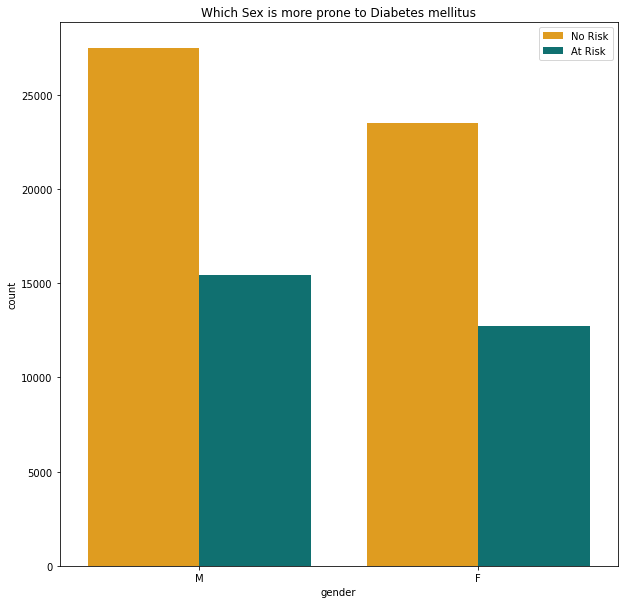

In [ ]:
#plotting the relationship between gender and target variable

my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = diabetes_data['gender'], hue = diabetes_data['diabetes_mellitus'], palette = my_palette)
plt.title("Which Sex is more prone to Diabetes mellitus")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is icu type related to Diabetes mellitus?**

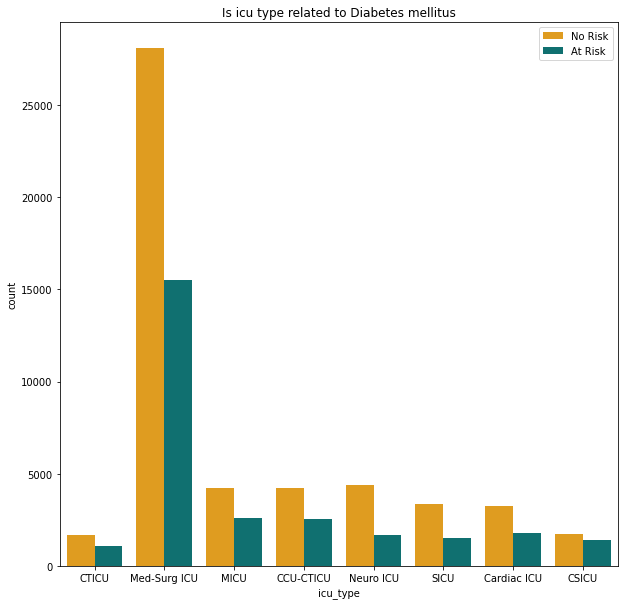

In [ ]:
#plotting the relationship between icu type and target variable

my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = diabetes_data['icu_type'], hue = diabetes_data['diabetes_mellitus'], palette = my_palette)
plt.title("Is icu type related to Diabetes mellitus")
plt.legend(['No Risk','At Risk'])
plt.show()

**Which Age Group is more vulnerable to Diabetes mellitus**

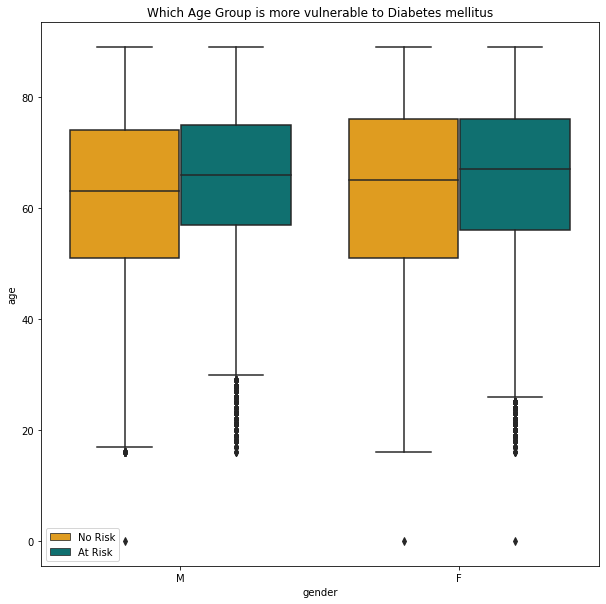

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = diabetes_data['gender'], y = diabetes_data['age'], hue = diabetes_data['diabetes_mellitus'], palette = my_palette)
plt.title("Which Age Group is more vulnerable to Diabetes mellitus")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

**Is weight related to Diabetes mellitus?**

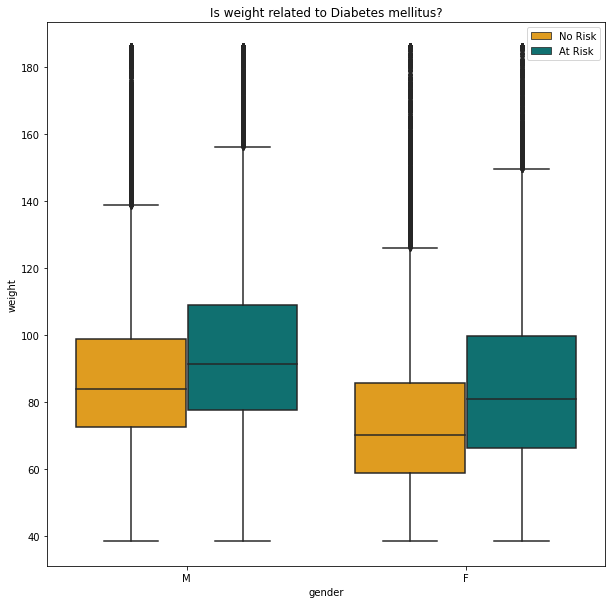

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = diabetes_data['gender'], y = diabetes_data['weight'], hue = diabetes_data['diabetes_mellitus'], palette = my_palette)
plt.title("Is weight related to Diabetes mellitus?")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

**Are BMI values related to diabetes_mellitus?**

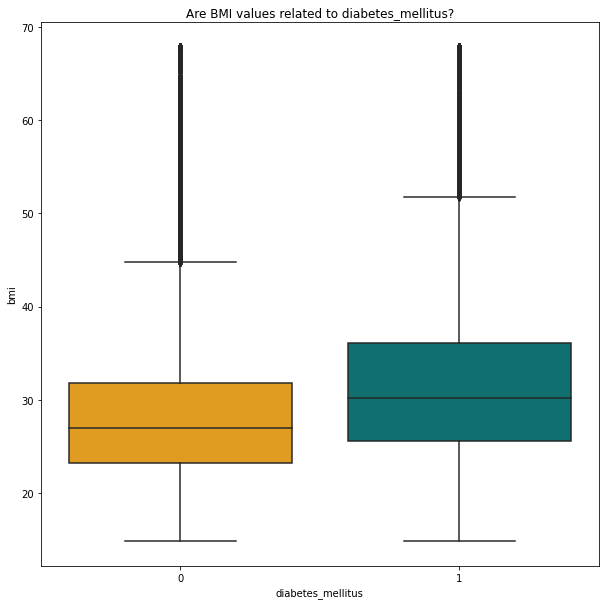

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(diabetes_data['diabetes_mellitus'], diabetes_data['bmi'], palette = my_palette)
plt.title("Are BMI values related to diabetes_mellitus?")
plt.show()

**Is Heart rate related to Diabetes mellitus?**

In [ ]:
# A function defining the heart rate category

def heart_rate(row):
    if row['heart_rate_apache'] <= 59:
        value = 'Low'
    elif row['heart_rate_apache'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [ ]:
diabetes_data['heartRateLabel'] = diabetes_data.apply(heart_rate, axis = 1)

In [ ]:
diabetes_data['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of 0          High
1          High
2          High
3        Normal
4          High
          ...  
79154      High
79155      High
79156      High
79157      High
79158      High
Name: heartRateLabel, Length: 79159, dtype: object>

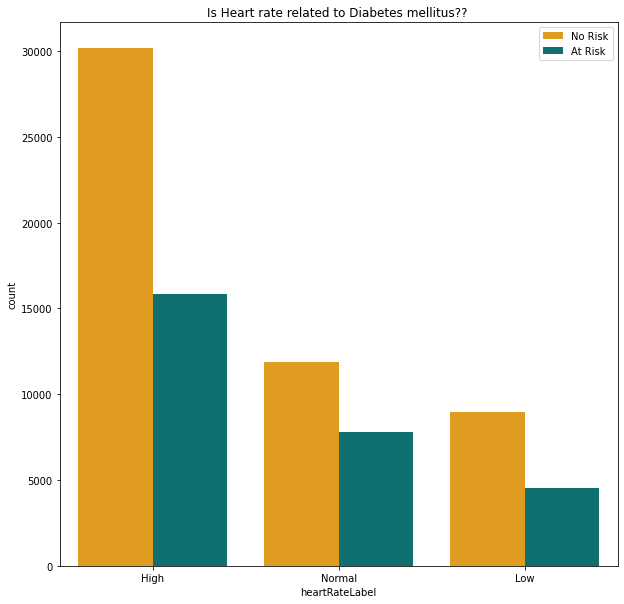

In [ ]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = diabetes_data['heartRateLabel'], hue = diabetes_data['diabetes_mellitus'], palette = my_palette)
plt.title("Is Heart rate related to Diabetes mellitus?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is patients BMI important to show the risk of Diabetes mellitus?**

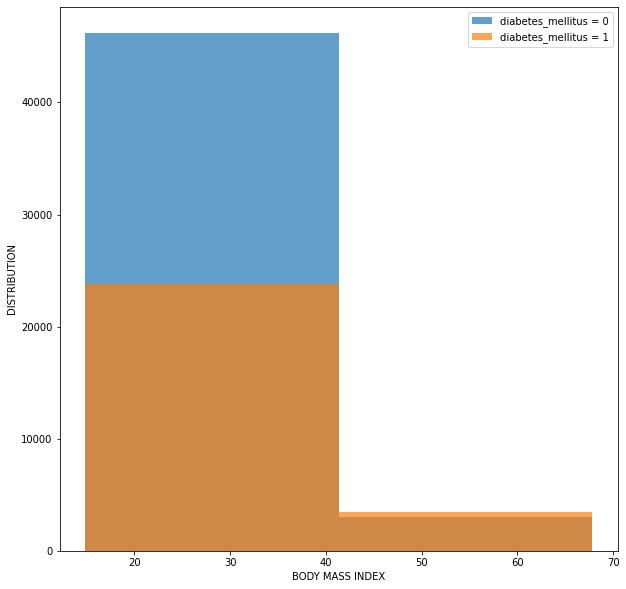

In [ ]:
plt.figure(figsize=(10,10))

plt.hist(diabetes_data['bmi'][diabetes_data['diabetes_mellitus'] == 0], bins=2, alpha = 0.7, label = 'diabetes_mellitus = 0')
plt.hist(diabetes_data['bmi'][diabetes_data['diabetes_mellitus'] == 1], bins=2, alpha = 0.7, label = 'diabetes_mellitus = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()


**Now lets visualise the distribution of data in each feature**

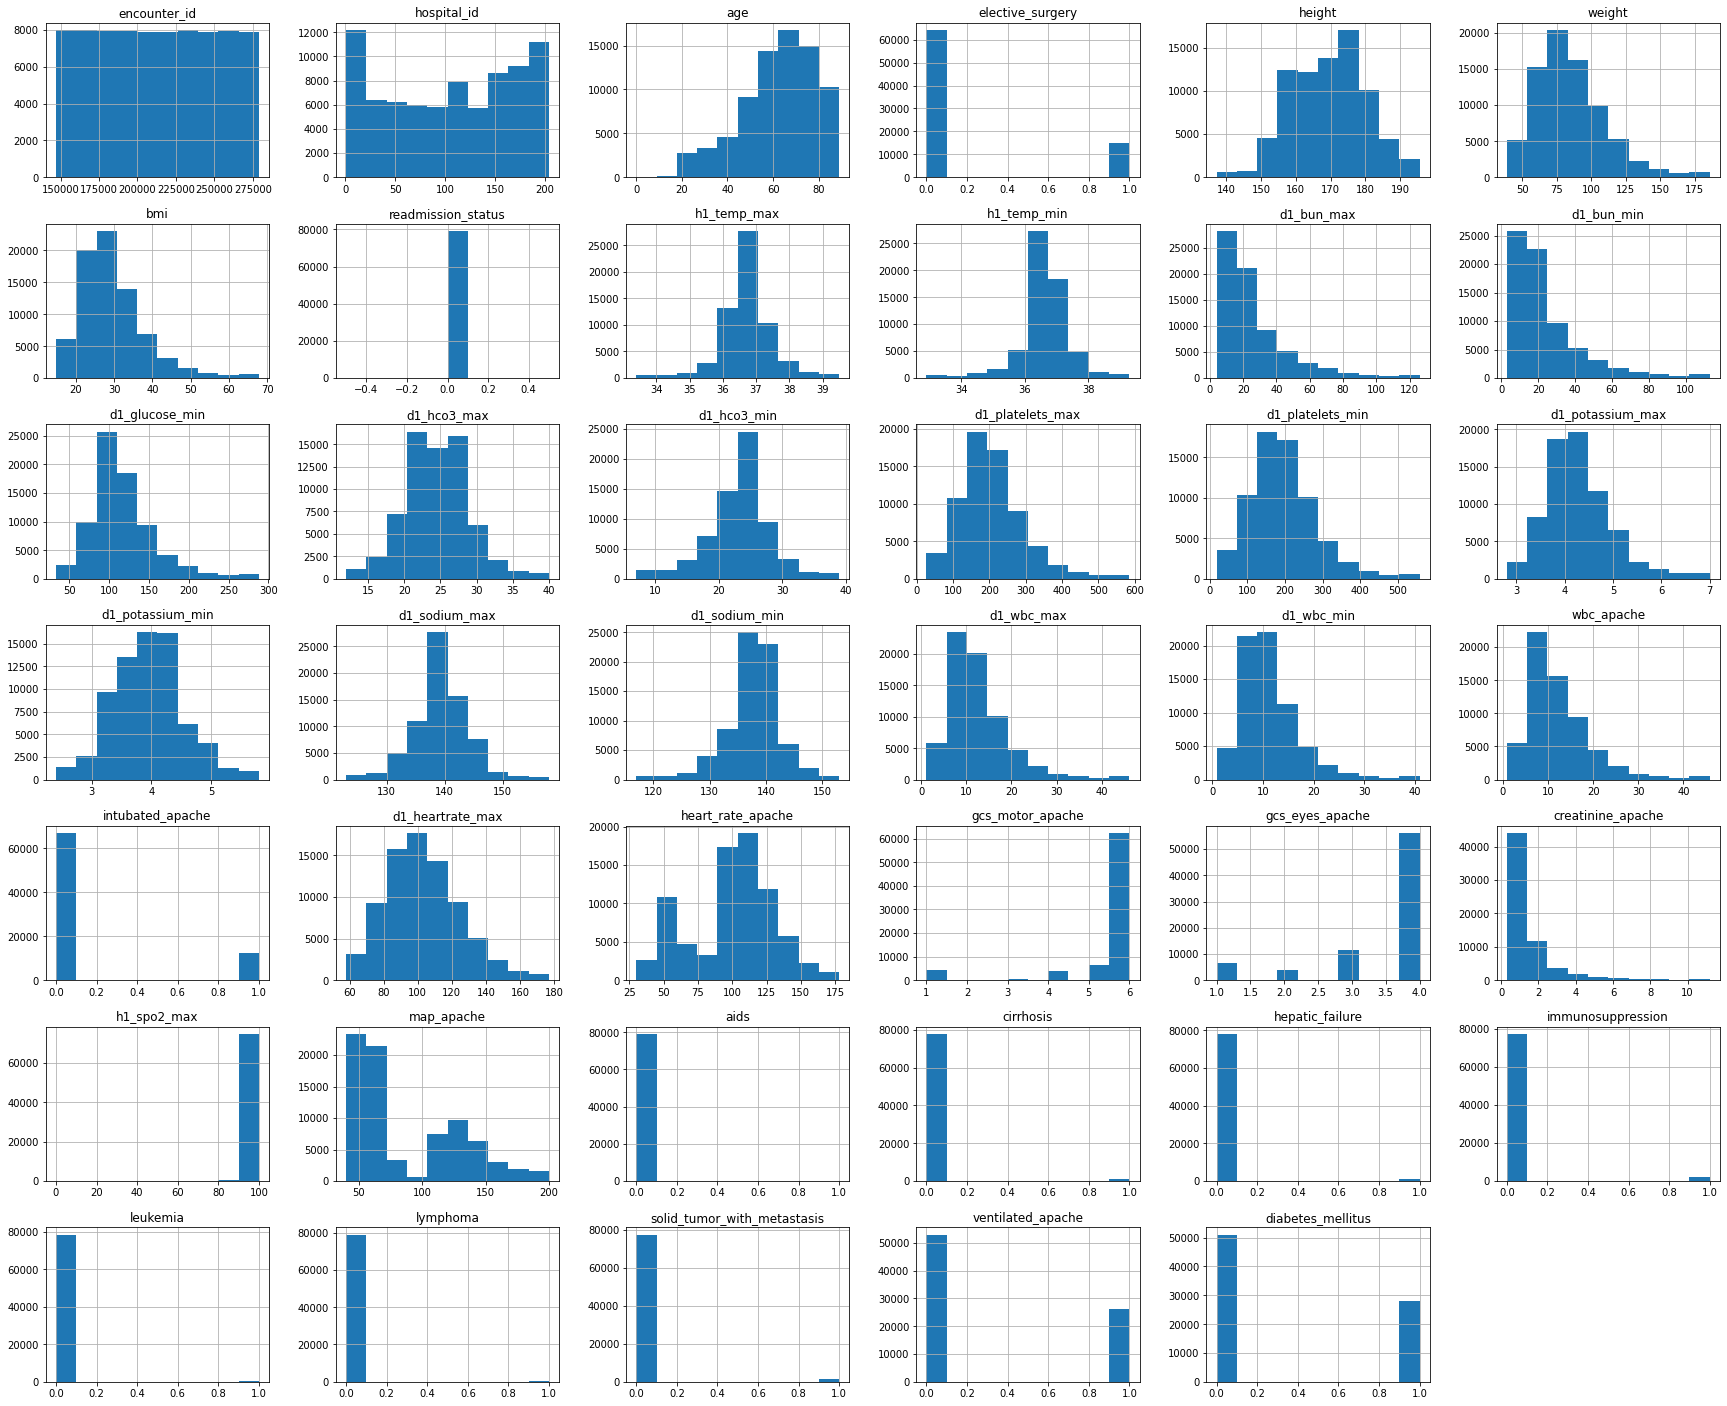

In [ ]:
# Code below plots the histograms for all the features and the distribution of the data can be observed

diabetes_data.hist(figsize=(30,25))
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(feature)
plt.show()


**As seen in the histograms there are some features which are skewed so we apply log transformation to convert them into Gaussian distribution.**

In [ ]:

from google.colab import files
diabetes_data.to_csv("Diabetes_cleaned.csv") 



In [ ]:
# Log transforming features


log_features=['weight', 'bmi', 'wbc_apache', 'd1_wbc_min','d1_wbc_max','d1_bun_max','d1_bun_min']

for feature in log_features:
    diabetes_data[feature]=np.log(diabetes_data[feature])



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dab70ced0>,
      dtype=object)

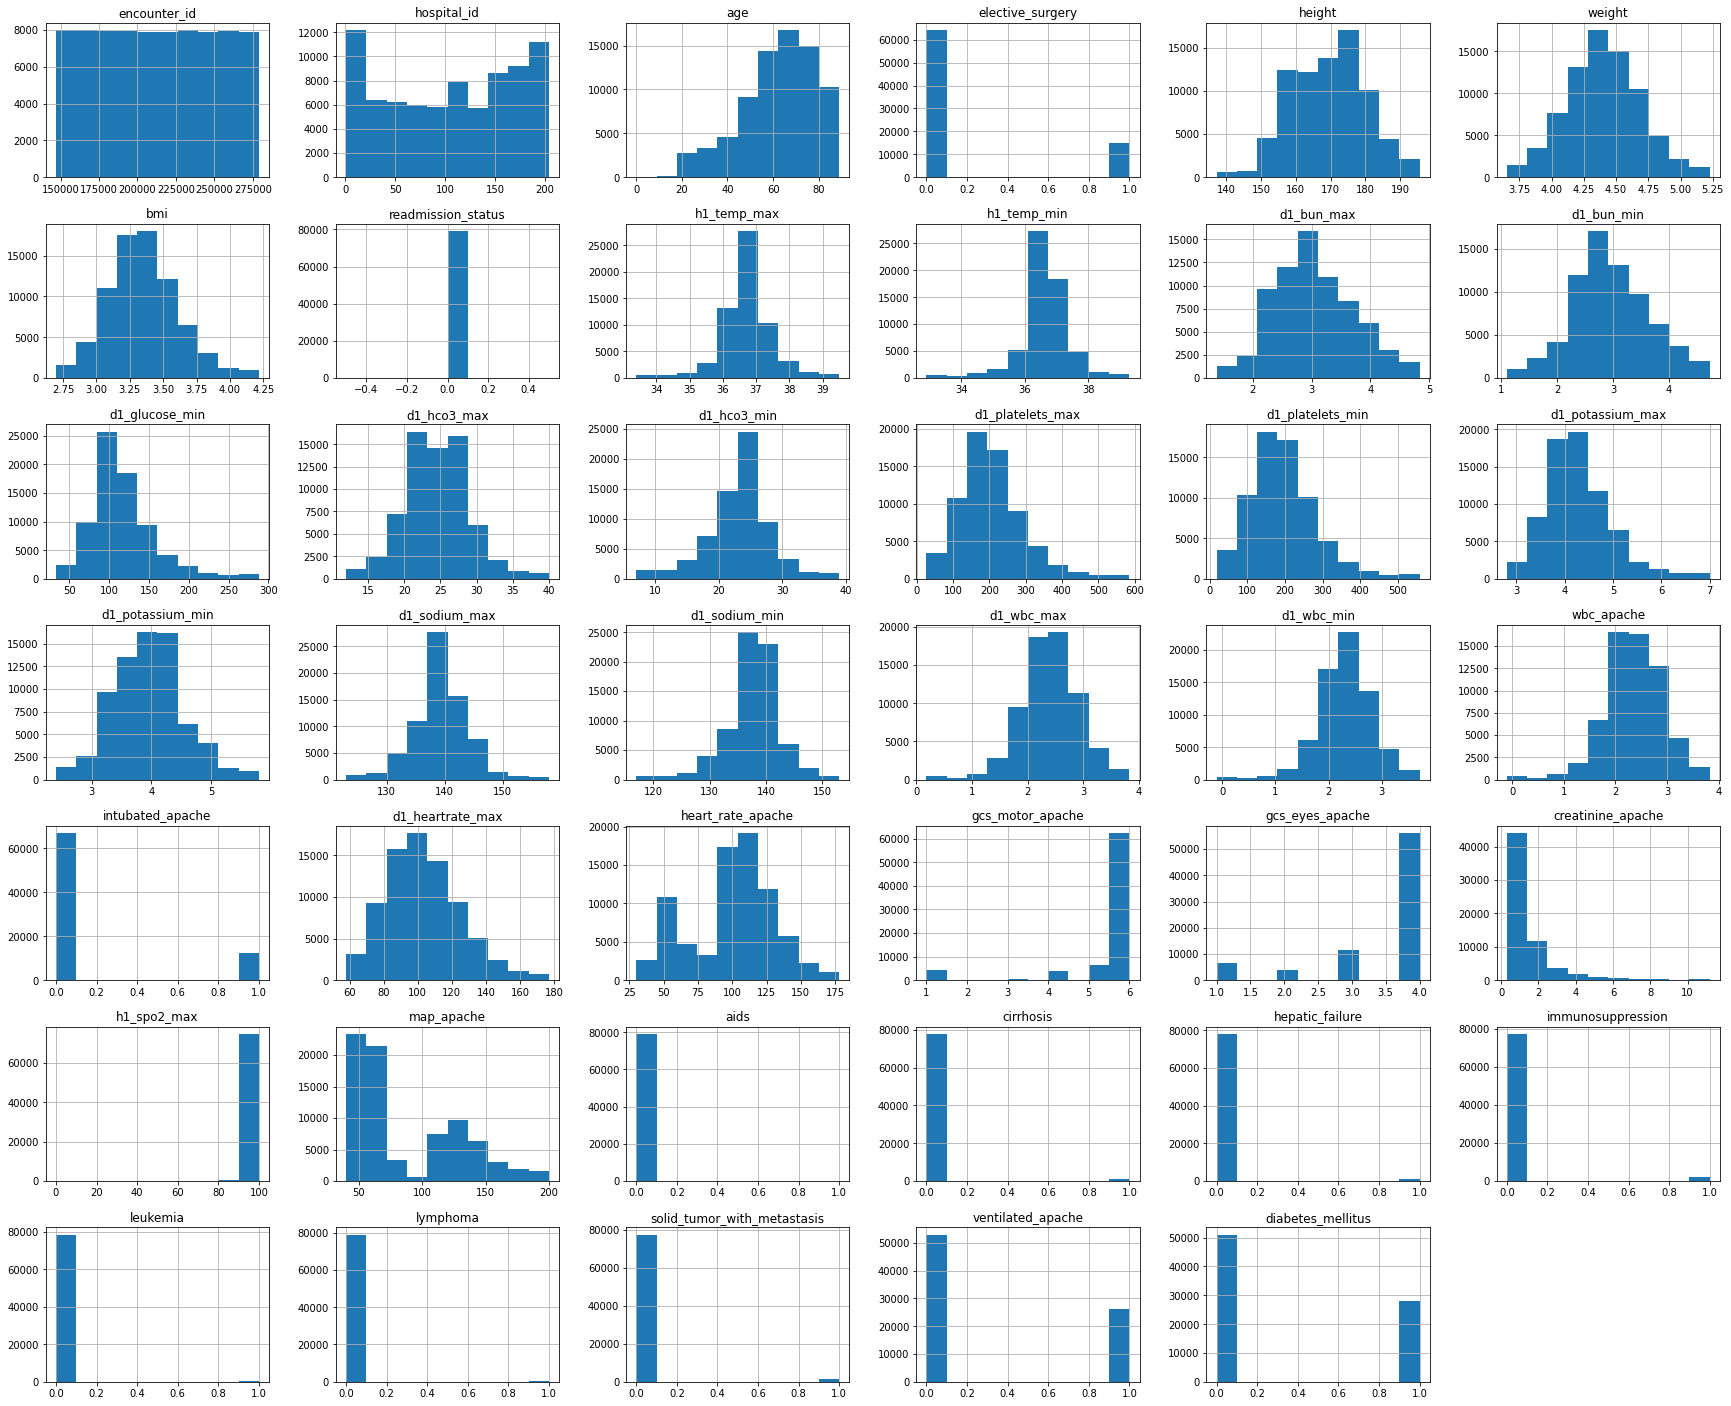

In [ ]:
#Plotting the histograms

diabetes_data.hist(figsize=(30,25))


**Missing values imputation**

In [ ]:
#Exploring the numeriacl variable

numerical_var = diabetes_data.select_dtypes(include=[np.number])
numerical_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   age                          76317 non-null  float64
 3   elective_surgery             79159 non-null  int64  
 4   height                       77978 non-null  float64
 5   weight                       77086 non-null  float64
 6   bmi                          76468 non-null  float64
 7   readmission_status           79159 non-null  int64  
 8   h1_temp_max                  61223 non-null  float64
 9   h1_temp_min                  61223 non-null  float64
 10  d1_bun_max                   71249 non-null  float64
 11  d1_bun_min                   71249 non-null  float64
 12  d1_glucose_min               74800 non-null  float64
 13  d1_hco3_max     

In [ ]:
#Exploring the numeriacl variable

categorical_var = diabetes_data.select_dtypes(exclude=[np.number])
categorical_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          79129 non-null  object
 1   ethnicity       78198 non-null  object
 2   icu_type        79159 non-null  object
 3   heartRateLabel  79159 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [ ]:
#Capturing NaN values in numeriacal variables

#Code below gives us the percentage of missing values in each numerical variable/feature

numerical_var_with_NaN = [features for features in numerical_var.columns if numerical_var[features].isnull().sum()>0.]

for feature in numerical_var_with_NaN:
  print(feature, np.round(numerical_var[feature].isnull().mean(), 4), "% NaN values")

age 0.0359 % NaN values
height 0.0149 % NaN values
weight 0.0262 % NaN values
bmi 0.034 % NaN values
h1_temp_max 0.2266 % NaN values
h1_temp_min 0.2266 % NaN values
d1_bun_max 0.0999 % NaN values
d1_bun_min 0.0999 % NaN values
d1_glucose_min 0.0551 % NaN values
d1_hco3_max 0.1503 % NaN values
d1_hco3_min 0.1503 % NaN values
d1_platelets_max 0.1411 % NaN values
d1_platelets_min 0.1411 % NaN values
d1_potassium_max 0.0908 % NaN values
d1_potassium_min 0.0908 % NaN values
d1_sodium_max 0.0962 % NaN values
d1_sodium_min 0.0962 % NaN values
d1_wbc_max 0.1324 % NaN values
d1_wbc_min 0.1324 % NaN values
wbc_apache 0.2242 % NaN values
d1_heartrate_max 0.0018 % NaN values
heart_rate_apache 0.002 % NaN values
gcs_motor_apache 0.0155 % NaN values
gcs_eyes_apache 0.0155 % NaN values
creatinine_apache 0.1842 % NaN values
h1_spo2_max 0.0481 % NaN values
map_apache 0.0029 % NaN values


In [ ]:
## Imputing the numerical NaN Values

for feature in numerical_var_with_NaN:
  
    #We impute the missing values by using median since there are outliers
    median_value=diabetes_data[feature].median()
    diabetes_data[feature].fillna(median_value,inplace=True)
    


In [ ]:
## Checking the numerical variables after imputation 

diabetes_data[numerical_var_with_NaN].isnull().sum()
    

age                  0
height               0
weight               0
bmi                  0
h1_temp_max          0
h1_temp_min          0
d1_bun_max           0
d1_bun_min           0
d1_glucose_min       0
d1_hco3_max          0
d1_hco3_min          0
d1_platelets_max     0
d1_platelets_min     0
d1_potassium_max     0
d1_potassium_min     0
d1_sodium_max        0
d1_sodium_min        0
d1_wbc_max           0
d1_wbc_min           0
wbc_apache           0
d1_heartrate_max     0
heart_rate_apache    0
gcs_motor_apache     0
gcs_eyes_apache      0
creatinine_apache    0
h1_spo2_max          0
map_apache           0
dtype: int64

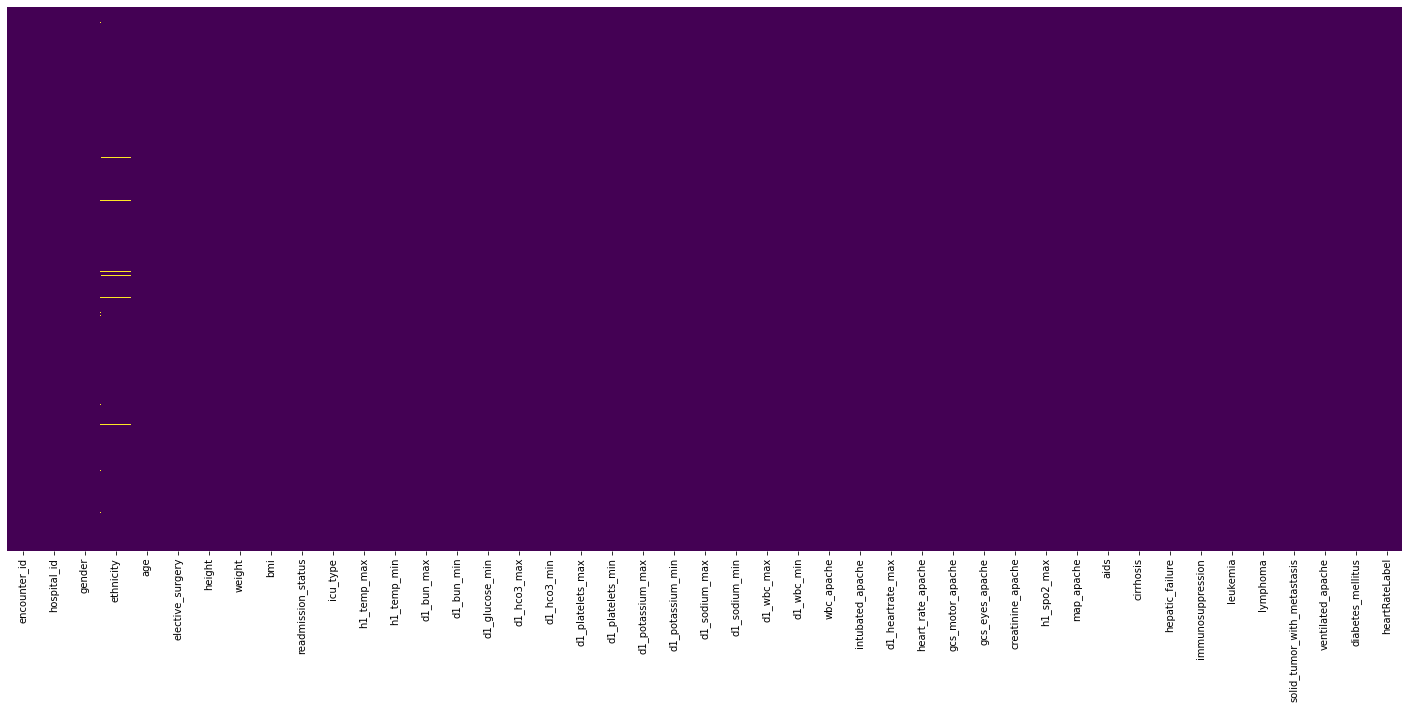

In [ ]:
# Code below plots the heatmap for the missing values in the dataset

plt.figure(figsize=(25,10))
sns.heatmap(diabetes_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**As we can see in the heatmap all the numerical missing values has been treated. Now lets go ahead and treat the missing values from categorical variable.**

In [ ]:
#Capturing NaN values in categorical variables

# Code below gives us the percentage of missing values in each categorical variable/feature

categorical_var_with_NaN = [features for features in categorical_var.columns if categorical_var[features].isnull().sum()>0.]

for feature in categorical_var_with_NaN:
  print(feature, np.round(categorical_var[feature].isnull().mean(), 4), "% NaN values")

gender 0.0004 % NaN values
ethnicity 0.0121 % NaN values


In [ ]:
# Filling up the categorical NaN values using mode

diabetes_data['gender'].fillna(diabetes_data['gender'].mode()[0], inplace=True)
diabetes_data['ethnicity'].fillna(diabetes_data['ethnicity'].mode()[0], inplace=True)

In [ ]:
## Checking the vategorical variables after imputation 

diabetes_data[categorical_var_with_NaN].isnull().sum()
    

gender       0
ethnicity    0
dtype: int64

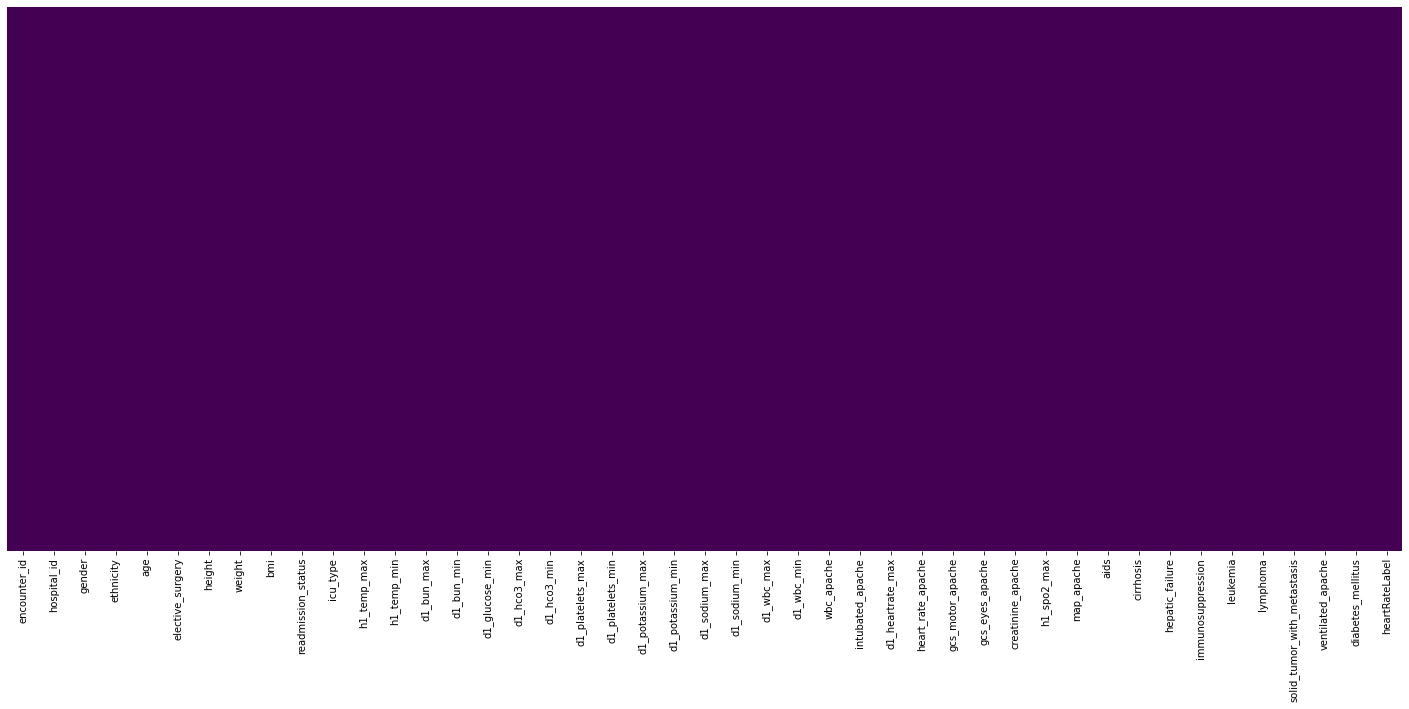

In [ ]:
# Code below plots the heatmap for the missing values in the dataset

plt.figure(figsize=(25,10))
sns.heatmap(diabetes_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**All the missing values has been treated**

**Let's check the correlation between the variables.**

In [ ]:
#Checking for the corelation 

diabetes_data.corr()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
encounter_id,1.000000,0.000501,-0.003199,0.000922,0.003586,0.001475,-0.000857,NaN,0.000930,0.002080,-0.000271,-0.000740,0.006374,0.003656,0.001070,0.003697,0.003046,-0.001519,-0.004899,0.003915,0.000707,0.005941,0.008040,0.006794,-0.004224,-0.002145,-0.002031,0.002562,-0.001658,0.001566,0.002568,-0.004169,0.001192,-0.002736,-0.003958,-0.000336,-0.001903,-0.001415,0.002943,-0.000246,-0.000177
hospital_id,0.000501,1.000000,-0.009457,0.028150,0.022391,0.017042,0.006861,NaN,-0.022588,-0.033022,-0.007911,-0.008339,0.012285,-0.015990,-0.019682,-0.011354,-0.015088,0.003058,-0.022697,0.031302,0.017703,0.005566,-0.003264,0.001663,0.010723,-0.012092,-0.000994,-0.014881,-0.008254,0.002770,0.012640,-0.011075,-0.003009,0.002586,0.004221,-0.004269,0.004024,0.001545,-0.003919,0.025863,0.001710
age,-0.003199,-0.009457,1.000000,0.055293,-0.103199,-0.106362,-0.066113,NaN,-0.066282,-0.068369,0.304714,0.342309,0.055053,0.068219,0.111458,-0.076227,-0.075224,0.051638,0.112692,0.003662,0.045709,-0.011545,-0.010954,-0.014369,0.008728,-0.142654,-0.154676,0.018484,0.018547,0.050933,-0.059900,-0.018732,-0.024894,-0.024530,-0.018158,0.020456,0.026191,0.023469,0.024779,0.041189,0.093369
elective_surgery,0.000922,0.028150,0.055293,1.000000,0.019550,0.031359,0.022484,NaN,-0.103682,-0.143471,-0.147556,-0.143523,-0.009630,-0.005472,0.012240,-0.052545,-0.083817,0.076836,0.034248,0.057835,0.040867,0.129863,0.073235,0.101363,0.171894,-0.076594,-0.071647,0.025985,0.019225,-0.094484,0.097856,-0.002077,-0.009495,-0.029320,-0.032419,-0.013430,-0.015444,-0.006665,0.016144,0.151935,-0.006135
height,0.003586,0.022391,-0.103199,0.019550,1.000000,0.405237,-0.045806,NaN,0.005114,0.005639,0.021713,0.024974,0.018267,0.021181,0.017799,-0.074428,-0.074110,0.045326,0.051289,-0.026158,-0.027388,-0.003324,-0.006065,-0.003855,0.025882,-0.017821,-0.020911,-0.011068,-0.008239,0.047350,-0.012774,0.031299,0.011886,0.009968,0.010457,0.000231,0.003335,-0.001588,0.007490,0.007756,-0.003293
weight,0.001475,0.017042,-0.106362,0.031359,0.405237,1.000000,0.881781,NaN,0.031664,0.034112,0.069245,0.080958,0.134306,0.089569,0.094761,-0.021722,-0.020182,0.097087,0.112378,-0.041790,-0.029266,0.037387,0.040717,0.041589,0.050912,-0.045603,-0.041254,0.014987,0.006068,0.080892,-0.062043,0.070040,-0.015327,0.001946,0.004913,-0.029811,-0.009996,-0.008947,-0.037751,0.072992,0.177265
bmi,-0.000857,0.006861,-0.066113,0.022484,-0.045806,0.881781,1.000000,NaN,0.031388,0.033803,0.065346,0.076563,0.137820,0.087267,0.094768,0.012072,0.013712,0.083716,0.096834,-0.032595,-0.018824,0.042493,0.047487,0.046958,0.043214,-0.039870,-0.034030,0.021122,0.010025,0.065207,-0.062261,0.061306,-0.022821,-0.002582,-0.000032,-0.032454,-0.012275,-0.009186,-0.044716,0.075979,0.194250
readmission_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h1_temp_max,0.000930,-0.022588,-0.066282,-0.103682,0.005114,0.031664,0.031388,NaN,1.000000,0.862461,-0.060933,-0.051505,0.041486,0.046015,0.076582,0.009227,0.028584,-0.104792,-0.028365,-0.052948,-0.011376,-0.010637,0.018430,0.001905,-0.088061,0.122130,0.126620,0.104572,0.082734,-0.046725,-0.037078,-0.009283,0.014002,-0.010168,-0.010170,0.024896,0.021547,0.008508,0.004240,-0.083435,-0.006695
h1_temp_min,0.002080,-0.033022,-0.068369,-0.143471,0.005639,0.034112,0.033803,NaN,0.862461,1.000000,-0.060154,-0.047755,0.045263,0.059233

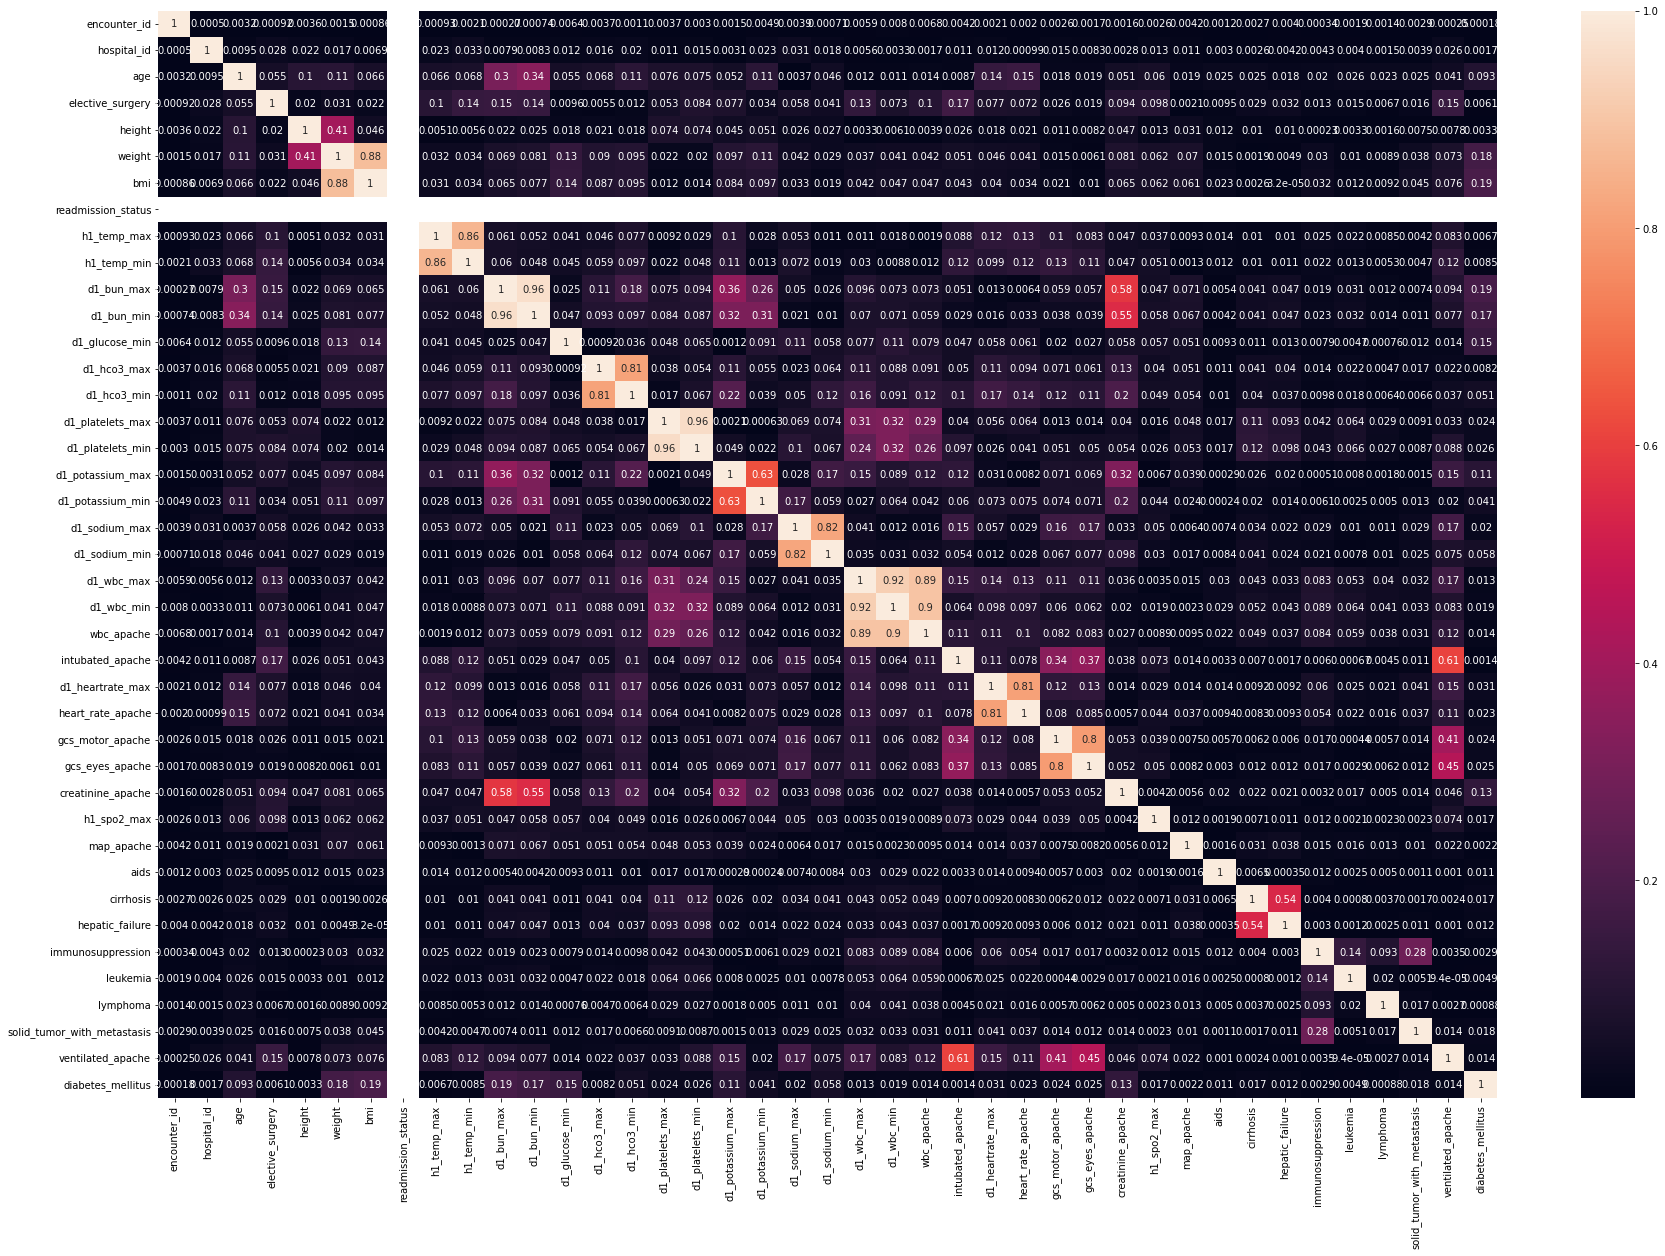

In [ ]:
#Plotting the correlation matrix using heatmap

plt.figure(figsize=(30,20))
correlation = diabetes_data.corr()
sns.heatmap(abs(correlation), annot=True)

#Model Building

In [ ]:
#Checking the data type in our dataset

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79159 non-null  object 
 3   ethnicity                    79159 non-null  object 
 4   age                          79159 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       79159 non-null  float64
 7   weight                       79159 non-null  float64
 8   bmi                          79159 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  79159 non-null  float64
 12  h1_temp_min                  79159 non-null  float64
 13  d1_bun_max      

**Perform One Hot Encoding on categorical columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(diabetes_data[['ethnicity']]).toarray())
encoder_df.columns = encoder.get_feature_names(['ETH'])
print(encoder_df)
encoded_data= pd.concat([diabetes_data, encoder_df], axis=1)
print(encoded_data)

       ETH_African American  ETH_Asian  ETH_Caucasian  ETH_Hispanic  \
0                       0.0        0.0            1.0           0.0   
1                       0.0        0.0            1.0           0.0   
2                       0.0        0.0            1.0           0.0   
3                       0.0        0.0            1.0           0.0   
4                       0.0        0.0            1.0           0.0   
...                     ...        ...            ...           ...   
79154                   0.0        0.0            1.0           0.0   
79155                   0.0        0.0            1.0           0.0   
79156                   1.0        0.0            0.0           0.0   
79157                   0.0        0.0            1.0           0.0   
79158                   0.0        0.0            1.0           0.0   

       ETH_Native American  ETH_Other/Unknown  
0                      0.0                0.0  
1                      0.0                0.0  
2  

In [ ]:
## Dropping the original ethnicity column from dataset

encoded_data.drop('ethnicity',axis=1,inplace=True)

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79159 non-null  object 
 3   age                          79159 non-null  float64
 4   elective_surgery             79159 non-null  int64  
 5   height                       79159 non-null  float64
 6   weight                       79159 non-null  float64
 7   bmi                          79159 non-null  float64
 8   readmission_status           79159 non-null  int64  
 9   icu_type                     79159 non-null  object 
 10  h1_temp_max                  79159 non-null  float64
 11  h1_temp_min                  79159 non-null  float64
 12  d1_bun_max                   79159 non-null  float64
 13  d1_bun_min      

In [ ]:
diabetes_data=encoded_data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(diabetes_data[['icu_type']]).toarray())
encoder_df.columns = encoder.get_feature_names(['icu'])
print(encoder_df)
encoded_data= pd.concat([diabetes_data, encoder_df], axis=1)
print(encoded_data)

       icu_CCU-CTICU  icu_CSICU  icu_CTICU  icu_Cardiac ICU  icu_MICU  \
0                0.0        0.0        1.0              0.0       0.0   
1                0.0        0.0        0.0              0.0       0.0   
2                0.0        0.0        1.0              0.0       0.0   
3                0.0        0.0        0.0              0.0       0.0   
4                0.0        0.0        0.0              0.0       0.0   
...              ...        ...        ...              ...       ...   
79154            0.0        0.0        0.0              0.0       0.0   
79155            0.0        0.0        0.0              0.0       1.0   
79156            0.0        0.0        1.0              0.0       0.0   
79157            1.0        0.0        0.0              0.0       0.0   
79158            0.0        0.0        0.0              0.0       0.0   

       icu_Med-Surg ICU  icu_Neuro ICU  icu_SICU  
0                   0.0            0.0       0.0  
1                   1

In [ ]:
## Dropping the original iu_type column from dataset

encoded_data.drop('icu_type',axis=1,inplace=True)

In [ ]:
diabetes_data=encoded_data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(diabetes_data[['heartRateLabel']]).toarray())
encoder_df.columns = encoder.get_feature_names(['HRT'])
print(encoder_df)
encoded_data= pd.concat([diabetes_data, encoder_df], axis=1)
print(encoded_data)

       HRT_High  HRT_Low  HRT_Normal
0           1.0      0.0         0.0
1           1.0      0.0         0.0
2           1.0      0.0         0.0
3           0.0      0.0         1.0
4           1.0      0.0         0.0
...         ...      ...         ...
79154       1.0      0.0         0.0
79155       1.0      0.0         0.0
79156       1.0      0.0         0.0
79157       1.0      0.0         0.0
79158       1.0      0.0         0.0

[79159 rows x 3 columns]
       encounter_id  hospital_id gender   age  elective_surgery  height  \
0            214826          118      M  68.0                 0   180.3   
1            276985          118      F  25.0                 0   172.7   
2            262220          118      F  81.0                 1   165.1   
3            201746           33      M  19.0                 0   188.0   
4            246060           81      F  77.0                 0   160.0   
...             ...          ...    ...   ...               ...     ...   
79154

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79159 non-null  object 
 3   age                          79159 non-null  float64
 4   elective_surgery             79159 non-null  int64  
 5   height                       79159 non-null  float64
 6   weight                       79159 non-null  float64
 7   bmi                          79159 non-null  float64
 8   readmission_status           79159 non-null  int64  
 9   h1_temp_max                  79159 non-null  float64
 10  h1_temp_min                  79159 non-null  float64
 11  d1_bun_max                   79159 non-null  float64
 12  d1_bun_min                   79159 non-null  float64
 13  d1_glucose_min  

In [ ]:
## Dropping the original heartrate column from dataset

encoded_data.drop('heartRateLabel',axis=1,inplace=True)

In [ ]:
diabetes_data = encoded_data

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79159 non-null  object 
 3   age                          79159 non-null  float64
 4   elective_surgery             79159 non-null  int64  
 5   height                       79159 non-null  float64
 6   weight                       79159 non-null  float64
 7   bmi                          79159 non-null  float64
 8   readmission_status           79159 non-null  int64  
 9   h1_temp_max                  79159 non-null  float64
 10  h1_temp_min                  79159 non-null  float64
 11  d1_bun_max                   79159 non-null  float64
 12  d1_bun_min                   79159 non-null  float64
 13  d1_glucose_min  

In [ ]:
#Converting categorical column 'gender' into numerical variable

# 1 = Male, 0 = Female
diabetes_data['gender'] = diabetes_data['gender'].apply(lambda x: 1 if x=='M' else 0)


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79159 non-null  int64  
 3   age                          79159 non-null  float64
 4   elective_surgery             79159 non-null  int64  
 5   height                       79159 non-null  float64
 6   weight                       79159 non-null  float64
 7   bmi                          79159 non-null  float64
 8   readmission_status           79159 non-null  int64  
 9   h1_temp_max                  79159 non-null  float64
 10  h1_temp_min                  79159 non-null  float64
 11  d1_bun_max                   79159 non-null  float64
 12  d1_bun_min                   79159 non-null  float64
 13  d1_glucose_min  

In [ ]:
## Splitting the independent and dependent variables

X = diabetes_data.drop(columns='diabetes_mellitus',axis=1)
Y = diabetes_data['diabetes_mellitus']

In [ ]:
# perform split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Supervised Learning Algorithms

**1.Naive Bayes Classifier**

In [ ]:
# Building and traininig the model

naive_bayes_model = GaussianNB().fit(X_train,Y_train)

In [ ]:
# predict values
train_preds = naive_bayes_model.predict(X_train)
test_preds = naive_bayes_model.predict(X_test)

In [ ]:
print(confusion_matrix(Y_train, train_preds))
print(confusion_matrix(Y_test, test_preds))

[[35577  5114]
 [15903  6733]]
[[9067 1249]
 [3892 1624]]


[[35577  5114]
 [15903  6733]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

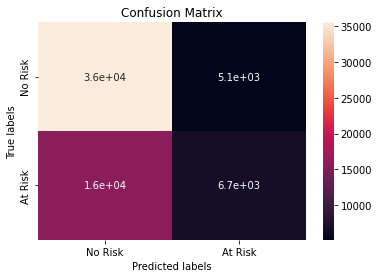

In [ ]:
# Get the confusion matrix for train 
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[9067 1249]
 [3892 1624]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

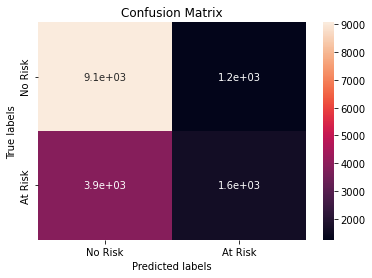

In [ ]:
# Get the confusion matrix for test 
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

ROCAUC score: 0.5866710919708776
Accuracy score: 0.675277918140475
              precision    recall  f1-score   support

           0       0.69      0.87      0.77     40691
           1       0.57      0.30      0.39     22636

    accuracy                           0.67     63327
   macro avg       0.63      0.59      0.58     63327
weighted avg       0.65      0.67      0.64     63327



              precision    recall  f1-score   support

           0       0.70      0.88      0.78     10316
           1       0.57      0.29      0.39      5516

    accuracy                           0.68     15832
   macro avg       0.63      0.59      0.58     15832
weighted avg       0.65      0.68      0.64     15832



**2.KNN Classifier**

In [ ]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, Y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, Y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, Y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

As we can see test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

In [ ]:
# plot_roc_curve(knn_cv,X,Y)
plt.title("Roc Auc Curve for kNN - " + str(knn_cv.best_params_['n_neighbors']))

**3.Logistic Regression**

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 1.07427383e-07, -1.75973255e-04,  2.16869742e-06,
         2.07878220e-03, -2.98351512e-06, -2.28379523e-03,
         3.98060486e-05,  5.38379335e-05,  0.00000000e+00,
        -4.95206466e-04, -4.97629164e-04,  1.97176087e-04,
         1.73071181e-04,  8.05529256e-03, -4.03325291e-04,
        -7.96027082e-04, -6.42243323e-05,  1.09495072e-04,
         8.15538079e-05, -8.78383066e-06, -1.99627763e-03,
        -2.34743584e-03, -2.08708574e-05, -1.53517683e-05,
        -2.04154099e-05,  1.40174014e-06, -2.32181296e-03,
        -2.12469464e-03, -1.40717029e-05, -3.27056394e-06,
         3.65002172e-04, -1.17566657e-03, -6.70021647e-04,
        -5.17018889e-07,  5.04772514e-06,  3.23003324e-06,
        -2.08515460e-07,  1.09876985e-06, -1.20389730e-07,
        -5.52456848e-06,  1.31870344e-05,  2.34860953e-05,
         2.30307409e-06, -5.69119820e-05,  4.94785602e-06,
         3.86249203e-06,  9.07786555e-06,  6.27418020e-06,
         1.44142828e-05,  3.76578274e-06, -8.05074894e-0

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,Y_train)
test_accuracy = accuracy_score(test_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6602081260757655
The accuracy on test data is  0.6698458817584638


[[39533  1158]
 [20360  2276]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

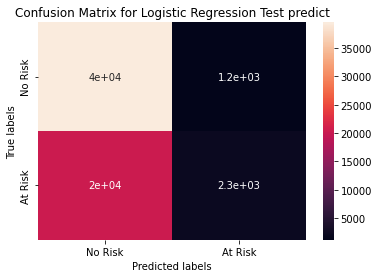

In [ ]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[10028   288]
 [ 4939   577]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

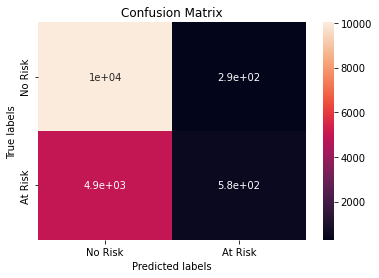

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

ROCAUC score: 0.5383434942404499
Accuracy score: 0.6698458817584638
              precision    recall  f1-score   support

           0       0.66      0.97      0.79     40691
           1       0.66      0.10      0.17     22636

    accuracy                           0.66     63327
   macro avg       0.66      0.54      0.48     63327
weighted avg       0.66      0.66      0.57     63327



              precision    recall  f1-score   support

           0       0.67      0.97      0.79     10316
           1       0.67      0.10      0.18      5516

    accuracy                           0.67     15832
   macro avg       0.67      0.54      0.49     15832
weighted avg       0.67      0.67      0.58     15832



Even Logistic Regression is not performing better, this might be due to imbalanced dataset. We have large number of record that are not at risk of diabetes and less number of records that are at risk of diabetes mellitus.

Let's Resample the dataset to over come this imbalance. We will apply **SMOTE (Synthetic Minority Oversampling Technique)** to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.


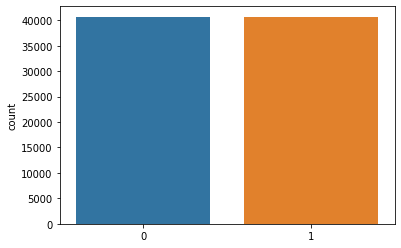

In [ ]:
smote = SMOTE()

# Intantiating Synthetic Minority Over Sampling Technique to balance target variable
X_balanced, Y_balanced = smote.fit_resample(X_train.values, Y_train.ravel())
sns.countplot(Y_balanced)

**Now as we have balanced the dataset we can apply logistic regression on balanced dataset**

In [ ]:
# split the data

X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=0)

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 3.78435651e-07, -2.43760410e-04,  9.88266926e-06,
         3.34855608e-03,  3.06874447e-06, -1.45920583e-03,
         9.57074106e-05,  1.04699774e-04,  0.00000000e+00,
        -2.96818248e-04, -3.08302818e-04,  2.85065330e-04,
         2.52905527e-04,  8.12920984e-03, -2.93402090e-04,
        -8.15493739e-04,  7.92267250e-06,  3.69392370e-04,
         1.44600143e-04,  2.22148982e-05, -1.25753705e-03,
        -1.74669710e-03, -6.33798630e-06,  1.49495095e-06,
        -5.79917385e-06,  3.26611992e-06, -2.41819684e-03,
        -1.91971788e-03,  3.46286119e-05,  2.98426165e-05,
         4.97906634e-04, -5.98861907e-04, -9.62257743e-04,
        -5.58048631e-07,  5.71451849e-06,  3.37748746e-06,
        -1.86920864e-06,  1.59752039e-06, -6.49393319e-07,
        -8.35633480e-06,  2.27084336e-05,  3.11659917e-05,
         3.93959688e-06, -6.89007479e-05,  7.59852340e-06,
         6.18410172e-06,  1.19845178e-05,  6.61470974e-06,
         2.21033587e-05,  6.74027259e-06, -2.73020767e-0

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,Y_train)
test_accuracy = accuracy_score(test_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.569341832424545
The accuracy on test data is  0.5688394667321988


[[5059 3120]
 [3898 4200]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

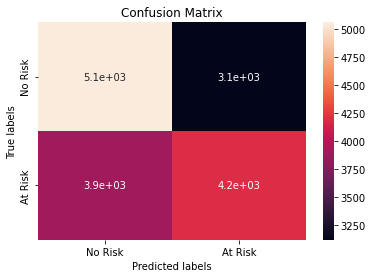

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

ROCAUC score: 0.5685909263315557
Accuracy score: 0.5688394667321988
              precision    recall  f1-score   support

           0       0.56      0.62      0.59     32512
           1       0.58      0.51      0.54     32593

    accuracy                           0.57     65105
   macro avg       0.57      0.57      0.57     65105
weighted avg       0.57      0.57      0.57     65105



              precision    recall  f1-score   support

           0       0.56      0.62      0.59      8179
           1       0.57      0.52      0.54      8098

    accuracy                           0.57     16277
   macro avg       0.57      0.57      0.57     16277
weighted avg       0.57      0.57      0.57     16277



**Our accuracy score is decreased but ROCAUC score improved.**
**Let's try tree based algorithm to solve this problem.**

**4.Building Desicion Tree Model**

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [ ]:
# Now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="gini",max_leaf_nodes= 10,random_state=0)
decision_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
#Predcting on test and train data

train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [ ]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(Y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 63.144314062787984
the training accuracy is 63.741648106904236


[Text(0.6166666666666667, 0.9, 'X[30] <= 1.0\ngini = 0.5\nsamples = 65105\nvalue = [32512, 32593]'),
 Text(0.43333333333333335, 0.7, 'X[13] <= 129.013\ngini = 0.48\nsamples = 35439\nvalue = [21292, 14147]'),
 Text(0.26666666666666666, 0.5, 'X[7] <= 3.334\ngini = 0.449\nsamples = 25956\nvalue = [17120, 8836]'),
 Text(0.13333333333333333, 0.3, 'X[15] <= 15.999\ngini = 0.392\nsamples = 14549\nvalue = [10662, 3887]'),
 Text(0.06666666666666667, 0.1, 'gini = 0.451\nsamples = 627\nvalue = [215, 412]'),
 Text(0.2, 0.1, 'gini = 0.375\nsamples = 13922\nvalue = [10447, 3475]'),
 Text(0.4, 0.3, 'X[3] <= 52.096\ngini = 0.491\nsamples = 11407\nvalue = [6458, 4949]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.402\nsamples = 3312\nvalue = [2389, 923]'),
 Text(0.4666666666666667, 0.1, 'gini = 0.5\nsamples = 8095\nvalue = [4069, 4026]'),
 Text(0.6, 0.5, 'X[7] <= 3.342\ngini = 0.493\nsamples = 9483\nvalue = [4172, 5311]'),
 Text(0.5333333333333333, 0.3, 'gini = 0.495\nsamples = 4219\nvalue = [2322, 1897]

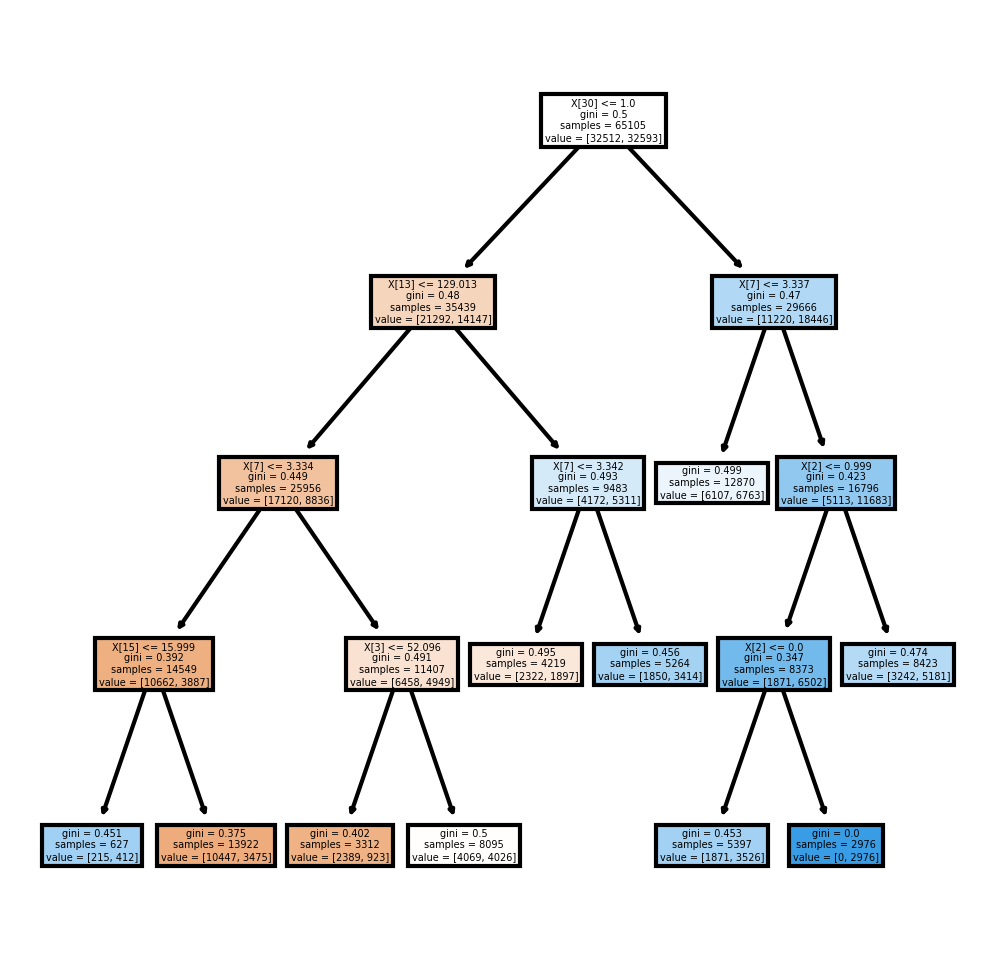

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[19227 13285]
 [10321 22272]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

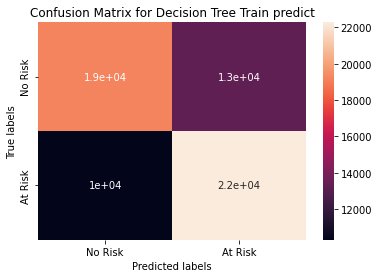

In [ ]:
#Confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4796 3383]
 [2616 5482]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

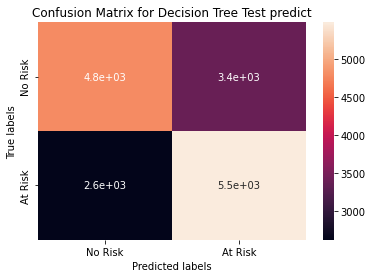

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62     32512
           1       0.63      0.68      0.65     32593

    accuracy                           0.64     65105
   macro avg       0.64      0.64      0.64     65105
weighted avg       0.64      0.64      0.64     65105



In [ ]:
#classification report for test
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      8179
           1       0.62      0.68      0.65      8098

    accuracy                           0.63     16277
   macro avg       0.63      0.63      0.63     16277
weighted avg       0.63      0.63      0.63     16277



**5.Random Forest Classifier**

In [ ]:
classifier = RandomForestClassifier(n_estimators=30,max_depth=20,random_state=30,min_samples_split=3,criterion='entropy')

In [ ]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=30, random_state=30)

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

**Finding the accuracy and Roc_Auc score**

In [ ]:
accuracy_score(Y_train,train_preds)

0.9773135703862991

In [ ]:
accuracy_score(Y_test,test_preds)

0.7594151256374024

In [ ]:
roc_auc_score(Y_test,test_preds)

0.7591658015209274

In [ ]:
roc_auc_score(Y_train,train_preds)

0.9773323966801178

[[32267   245]
 [ 1232 31361]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

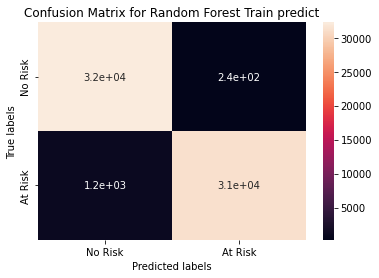

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6619 1560]
 [2356 5742]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

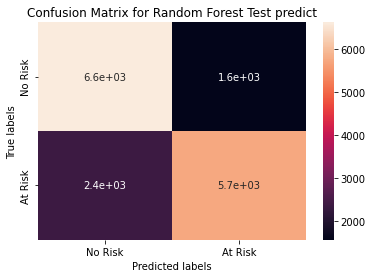

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     32512
           1       0.99      0.96      0.98     32593

    accuracy                           0.98     65105
   macro avg       0.98      0.98      0.98     65105
weighted avg       0.98      0.98      0.98     65105



In [ ]:
#classification report for test
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      8179
           1       0.79      0.71      0.75      8098

    accuracy                           0.76     16277
   macro avg       0.76      0.76      0.76     16277
weighted avg       0.76      0.76      0.76     16277



**6.Gradient Boosting Classifier**

In [ ]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [ ]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [ ]:
gradientBC.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

**The accuracy and Roc_Auc Score**

In [ ]:
accuracy_score(Y_train,train_preds)

0.7733968205206974

In [ ]:
accuracy_score(Y_test,test_preds)

0.7666646187872458

In [ ]:
roc_auc_score(Y_test,test_preds)


0.766332925392998

In [ ]:
roc_auc_score(Y_train,train_preds)

0.7734844705661763

[[27438  5074]
 [ 9679 22914]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

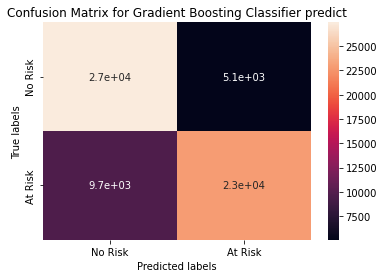

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6813 1366]
 [2432 5666]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

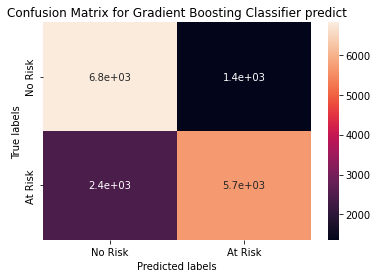

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifier')

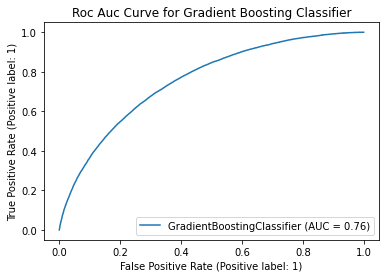

In [ ]:
plot_roc_curve(gradientBC,X,Y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

**classification report of train and test**

In [ ]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      8179
           1       0.81      0.70      0.75      8098

    accuracy                           0.77     16277
   macro avg       0.77      0.77      0.77     16277
weighted avg       0.77      0.77      0.77     16277



              precision    recall  f1-score   support

           0       0.74      0.84      0.79     32512
           1       0.82      0.70      0.76     32593

    accuracy                           0.77     65105
   macro avg       0.78      0.77      0.77     65105
weighted avg       0.78      0.77      0.77     65105



**7.XGBoost Classifier**

In [ ]:
#Using XGBoost Classifier

xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [ ]:
xg_cla.fit(X_test,Y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [ ]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [ ]:
accuracy_score(Y_train,train_preds)

0.741924583365333

In [ ]:
accuracy_score(Y_test,test_preds)

0.8628739939792345

In [ ]:
roc_auc_score(Y_test,test_preds)

0.8626706465434085

In [ ]:
roc_auc_score(Y_train,train_preds)

0.7419903039305635

[[25841  6671]
 [10131 22462]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

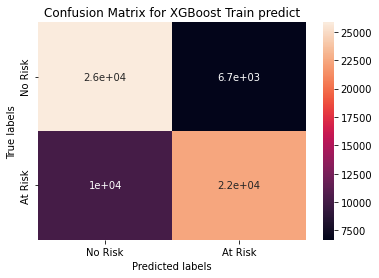

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7390  789]
 [1443 6655]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

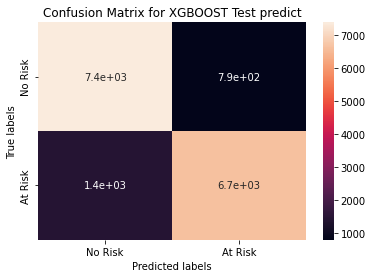

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Classification Report For train and test**

In [ ]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      8179
           1       0.89      0.82      0.86      8098

    accuracy                           0.86     16277
   macro avg       0.87      0.86      0.86     16277
weighted avg       0.87      0.86      0.86     16277



              precision    recall  f1-score   support

           0       0.72      0.79      0.75     32512
           1       0.77      0.69      0.73     32593

    accuracy                           0.74     65105
   macro avg       0.74      0.74      0.74     65105
weighted avg       0.74      0.74      0.74     65105



**Visualising the tree**

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.540897 to fit


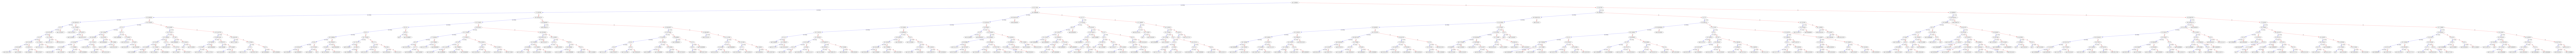

In [ ]:
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(200, 10)
plt.show()

**Looking at the feature importance**

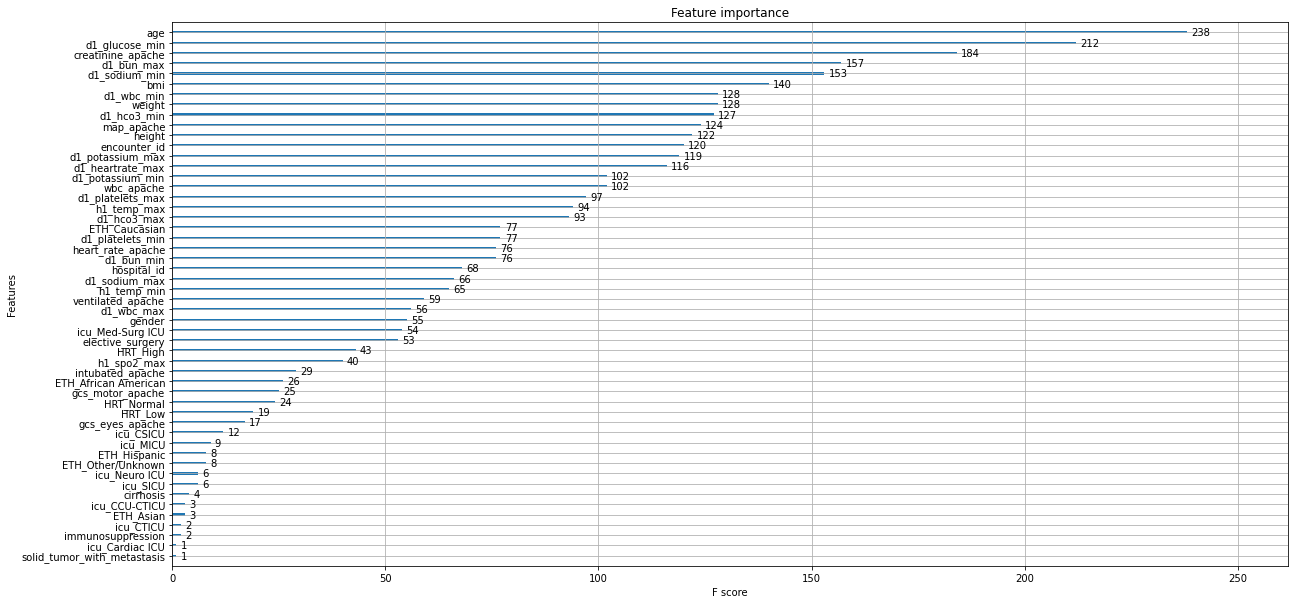

In [ ]:
orig_feature_names = list(diabetes_data.columns)
orig_feature_names.remove('diabetes_mellitus')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(20, 10)
plt.show()

# Unsupervised Learning Algorithm

**K-means Clustering**

In [ ]:
# Importing KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Choosing number of clusters using WCSS (Within clusters sum squares)

In [ ]:
from numpy.random.mtrand import random_sample
# Fnding WCSS values for different number of clusters
wcss= []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


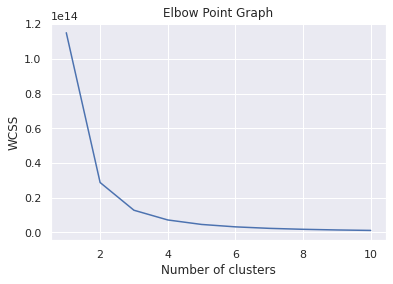

In [ ]:
#Plotting an Elbow point graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As can be seen from the elbow point graph the number of clusters to be choosen are 3. 

**Number of Clusters=3**

**Lets train the KMeans model**

In [ ]:
# kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)

# ##Return a label for each data point bsaed on the clusters
# Kmc = kmeans.fit_predict(X)

# print(Kmc)

For n_clusters = 3 The average silhouette_score is : 0.5899860103535256


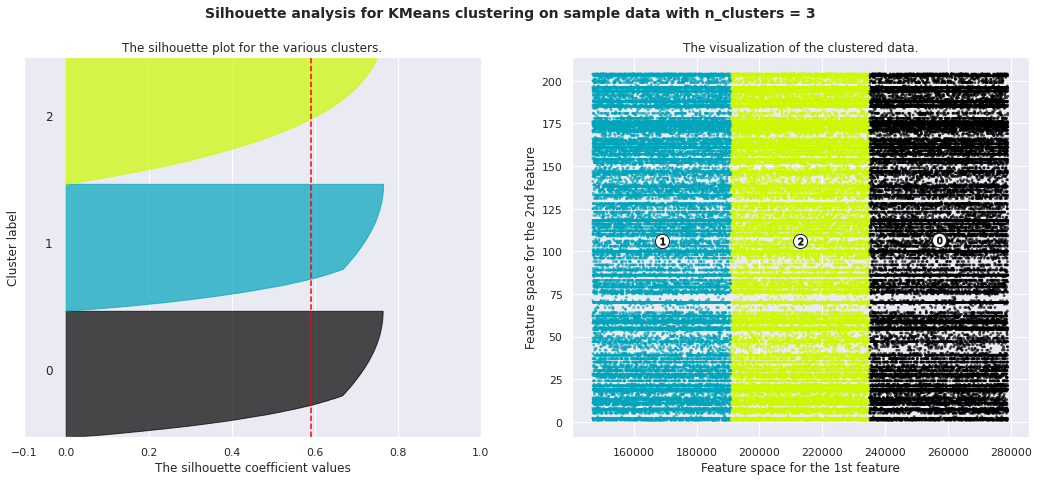

In [ ]:
import matplotlib.cm as cm

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

##END